# Sentiment Analysis on Amazon Reviews using Text Classification Models

---

## Abstract
This tutorial presents the implementation and comparison of two text classification architectures—a Bag-of-Words with Multilayer Perceptron (BoW+MLP) and a Convolutional Neural Network (CNN)—for sentiment analysis on the Amazon polarity dataset. The complete machine learning pipeline, including data loading, text preprocessing, vocabulary construction, model training, hyperparameter tuning, and performance evaluation, is demonstrated using PyTorch. Various hyperparameter configurations are tested systematically to assess their impact on model accuracy and generalization. Our analysis provides practical insights into selecting effective model architectures and hyperparameters for text classification tasks.


## Learning Objectives

By completing this tutorial, you will be able to:

1. Implement and train neural network-based text classification models (BoW+MLP and CNN) using PyTorch.
2. Perform systematic hyperparameter tuning to improve model performance.
3. Evaluate and interpret the performance of text classification models using appropriate metrics (e.g., accuracy, confusion matrix, F1-score).
4. Compare and analyze the effectiveness of different neural architectures for sentiment analysis tasks.
5. Construct a complete machine learning pipeline from raw data preprocessing to model evaluation and results visualization.
---
## Table of Contents
1. [Introduction](#introduction)
2. [Comparison with Similar Tutorials](#comparison)
3. [Environment Setup and Library Imports](#setup)
4. [Data Processing](#data-processing)
   - 4.1 [Loading the Dataset](#data-loading)
   - 4.2 [Text Preprocessing](#preprocessing)
   - 4.3 [Building the Vocabulary](#vocabulary)
   - 4.4 [Data Preparation and Dataset Splitting](#data-preparation)
5. [Model Architecture](#architecture)
   - 5.1 [BoW+MLP Model](#bow-mlp)
   - 5.2 [CNN Model](#cnn)
6. [Training and Evaluation Framework](#training)
7. [Hyperparameter Experiments](#hyperparameters)
   - 7.1 [Configuration 1: Baseline](#config1)
      - 7.1.1 [Analysis of Results](#results1)
   - 7.2 [Configuration 2: Adding Weight Decay](#config2)
      - 7.2.1 [Analysis of Results](#results2)
   - 7.3 [Configuration 3: Increasing Dropout](#config3)
      - 7.3.1 [Analysis of Results](#results3)
   - 7.4 [Configuration 4: Lower Learning Rate](#config4)
      - 7.4.1 [Analysis of Results](#results4)
8. [Advanced Model Evaluation](#advanced-evaluation)
   - 8.1 [ROC Curves](#roc)
   - 8.2 [Confusion Matrices](#confusion-matrix)
9. [Comprehensive Performance Analysis](#overall-analysis)
10. [Conclusion](#conclusion)
11. [References](#references)

---


## <u>1. Introduction to Sentiment Analysis</u> <a name="introduction"></a>

Sentiment analysis is a natural language processing (NLP) task that involves determining the emotional tone behind a piece of text. It has widespread applications across various domains, including business intelligence, social media monitoring, market research, and customer service. In this tutorial, we specifically focus on **binary sentiment classification (positive/negative)** using the Amazon Polarity dataset, comprising product reviews labeled clearly as positive or negative. While many online tutorials often showcase either a single model architecture or emphasize advanced transformer-based models, our approach is unique in comparing two distinct neural architectures—**Bag-of-Words with Multilayer Perceptron (BoW+MLP)** and **Convolutional Neural Network (CNN)**. Furthermore, we systematically evaluate multiple hyperparameter configurations, providing deeper insights into the trade-offs involved in model selection and hyperparameter tuning for NLP tasks.
___
## <u>2. Comparison with Similar Tutorials</u>

The tutorial integrates two neural architectures—Bag-of-Words with Multilayer Perceptron (BoW+MLP) and Convolutional Neural Network (CNN)—within a unified PyTorch pipeline. This comparative framework enables direct assessment of performance trade-offs between different architectures trained on identical data.

**In contrast to Brownlee (2020):**
- Brownlee offers an accessible but simplistic Keras-based BoW model
- His approach is limited by a smaller dataset (2,000 reviews)
- Our implementation scales to the larger Amazon Polarity dataset, enabling insights into real-world applicability

**Compared to Rath (2023):**
- Like our tutorial, Rath utilizes PyTorch and larger datasets (IMDB)
- However, his presented model remains basic with little architecture exploration
- Our work methodically experiments with varying hyperparameters, explicitly demonstrating their influence on model accuracy and generalization

### <u>Implementation Approach</u>

**CNN Implementation Comparisons:**
- Our CNN implementation follows the foundations established by Kim's (2014) influential architecture, similar to Trevett's tutorial
- However, Trevett relies heavily on the TorchText library, which adds an abstraction layer potentially hindering comprehension
- Our approach uses transparent and clearly delineated data preprocessing steps, making the learning experience more straightforward

**Theoretical vs. Practical Balance:**
- Camacho's (2020) tutorial provides deeper theoretical insights into CNN mechanics with pre-trained embeddings
- While valuable, Camacho's complexity may overwhelm newcomers
- Our balanced strategy combines practical code execution with sufficient theoretical grounding, maintaining an approachable yet insightful educational narrative

### <u>Unique Contributions</u>

The primary strengths of our tutorial include:

1. **Comprehensive Experimentation:** We systematically explore multiple hyperparameter configurations (embedding dimensions, dropout rates, learning rates, and weight decay), demonstrating their impacts on performance metrics

2. **Unified Comparative Framework:** By implementing both BoW+MLP and CNN models in a single notebook, we enable direct comparison of architectural differences that is rarely found in single tutorials

3. **Educational Progression:** Our tutorial presents a logical progression from simpler to more complex architectures, making it accessible for learners at various levels of expertise

4. **Transparent Implementation:** Without relying heavily on abstraction libraries, our code demonstrates core PyTorch concepts directly, fostering deeper understanding

This tutorial uniquely blends comprehensive experimentation, transparent PyTorch implementation, and a comparative educational narrative within a single coherent resource, addressing critical methodological insights often fragmented across multiple existing tutorials.

___
## <u>3. Environment Setup and Library Imports</u> <a name="setup"></a>
We begin by importing the necessary libraries for our sentiment analysis pipelin

In [302]:
import re  # Provides support for regular expressions
from collections import Counter  # Facilitates counting hashable objects
import pandas as pd  # Essential for data manipulation and analysis
import os  # Offers functions to interact with the operating system
import numpy as np  # Supports large, multi-dimensional arrays and matrices
import torch  # Core PyTorch library for tensor operations
import torch.nn as nn  # Contains neural network modules and functions
import torch.nn.functional as F  # Provides additional functions for neural networks
import torch.optim as optim  # Implements optimization algorithms
from torch.utils.data import Dataset, DataLoader, TensorDataset  # Utilities for data handling in PyTorch

from sklearn.metrics import (
    accuracy_score,  # Calculates the accuracy classification score
    classification_report,  # Builds a text report showing main classification metrics
    confusion_matrix,  # Computes confusion matrix to evaluate accuracy
    roc_curve,  # Computes Receiver Operating Characteristic (ROC)
    auc,  # Computes Area Under the Curve (AUC) for ROC
    precision_recall_curve  # Computes precision-recall pairs for different probability thresholds
)

import matplotlib.pyplot as plt  # Plotting library for creating static, animated, and interactive visualizations
import seaborn as sns  # Data visualization library based on matplotlib; provides a high-level interface for drawing attractive statistical graphics
from tqdm.auto import tqdm  # Displays progress bars for loops and iterable objects
import time  # Provides various time-related functions

from datasets import load_dataset  # Enables access to the Amazon Reviews dataset
from sklearn.model_selection import train_test_split  # Assists in splitting data into training and validation sets



These libraries serve distinct and complementary purposes within our sentiment analysis pipeline:

- **PyTorch (`torch`, `nn`, `F`, `optim`)**  
  Deep learning framework used for building and training neural networks.

- **NumPy and Pandas**  
  Used for efficient data manipulation and numerical operations.

- **Scikit-learn**  
  Provides tools for evaluating model performance (accuracy scores, confusion matrices) and performing data splits for training and validation.

- **Matplotlib and Seaborn**  
  Libraries employed for visualizing data and results through various plots, charts, and graphs.

- **Hugging Face's Datasets**  
  Facilitates easy access and management of the Amazon Polarity dataset.

- **Regular Expressions (`re`)**  
  Used in text preprocessing steps for basic text cleaning, such as removing punctuation and extra whitespace.
___

## <u>4.Data Preprocessing</u> <a name="preprocessing"></a>

The Amazon Polarity dataset represents a significant resource for sentiment analysis research, comprising a vast collection of Amazon product reviews spanning an 18-year period up to March 2013. This dataset includes approximately 35 million reviews from over 6.6 million users across nearly 2.5 million products. It employs a binary classification scheme where reviews with scores of 1-2 are labeled as negative (class 1), and reviews with scores of 4-5 are considered positive (class 2), while reviews with a score of 3 are intentionally excluded to create clearer sentiment boundaries. (Zhang, 2015)



### <u>4.1 Loading The Dataset <u>
Each review entry contains three key components: the review title, the full review text content, and the binary sentiment label.
We will load the Amazon Polarity dataset from Hugging Face's datasets library and select subsets of the training and testing data to work with:


In [304]:
# Load the Amazon Polarity dataset, which contains Amazon reviews labeled as positive or negative
dataset = load_dataset('amazon_polarity')

# Select a subset of 100,000 samples from the training set for quicker experimentation
small_train = dataset['train'].select(range(100000))  # Adjust size as needed

# Select a subset of 10,000 samples from the test set for quicker experimentation
small_test = dataset['test'].select(range(10000))     # Adjust size as needed

# Display the first sample from the training subset to understand its structure and content
print("Sample training record:")
print(small_train[0])


Sample training record:
{'label': 1, 'title': 'Stuning even for the non-gamer', 'content': 'This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'}


### <u>4.2 Text Processing </u>
Next, we define a text cleaning function to preprocess our review text:

In [307]:
# Text Preprocessing Function
# This function applies basic text cleaning using regular expressions. [1]
def clean_text(text):
    """
    Basic regex-based cleaning:
      - Converts text to lowercase
      - Removes non-alphabetic characters (e.g., numbers, punctuation)
      - Eliminates extra whitespace

    References:
        - Python 're' library: https://docs.python.org/3/library/re.html
    """
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove all characters except alphabets and spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single space and strip leading/trailing spaces
    return text

### End of source [1]

# source [1] https://docs.python.org/3/library/re.html


This preprocessing step is crucial for reducing noise in the text data. By converting to lowercase and removing non-alphabetic characters, we standardize the text format and reduce the vocabulary size, which helps our models focus on the important patterns in the text rather than stylistic variations. For more advanced preprocessing, researchers like Hashmi (2024) have employed additional techniques for Amazon reviews, including stopword removal, HTML tag stripping, and elimination of short words.

### <u>4.3 Building the Vocabulary</u> <a name="vocabulary"></a>

We build a vocabulary dictionary from the training data, which maps words to indices for our models:



In [309]:
# Vocabulary Builder Function
# This function constructs a vocabulary dictionary from the dataset, keeping only frequent words. [1]
def build_vocab(dataset_split, min_freq=5, max_words=50000):
    """
    Build a vocabulary dictionary from the dataset based on word frequency.

    - Counts occurrences of each word in the dataset
    - Retains words that appear at least `min_freq` times (default: 5)
    - Limits the vocabulary size to `max_words` (default: 50,000)
    - Assigns unique indices to words, starting from index 2
    - Includes special tokens:
        - "<PAD>": 0 (for padding sequences)
        - "<UNK>": 1 (for unknown words)

    References:
        - Python 're' library: https://docs.python.org/3/library/re.html
    """
    counter = Counter()  # Initialize a word frequency counter

    # Iterate over dataset and update word frequency counts
    for example in dataset_split:
        tokens = clean_text(example['content']).split()  # Tokenize cleaned text
        counter.update(tokens)  # Update word counts

    # Select most common words, ensuring they appear at least `min_freq` times
    words = [word for word, freq in counter.most_common(max_words) if freq >= min_freq]

    # Assign a unique index to each word (starting from index 2)
    vocab = {word: idx + 2 for idx, word in enumerate(words)}

    # Add special tokens for padding and unknown words
    vocab["<PAD>"] = 0
    vocab["<UNK>"] = 1

    return vocab

### End of source [1]

# source [1] https://docs.python.org/3/library/re.html


This function:
- Counts the frequency of each word in the training data
- Keeps only words that appear at least `min_freq` times (default: 5)
- Limits the vocabulary to a maximum of `max_words` (default: 50,000)
- Adds special tokens for padding (`<PAD>`) and unknown words (`<UNK>`)

Limiting the vocabulary size is important for efficiency, as it reduces the model's parameter count while still capturing the most relevant words for sentiment analysis.

### <u>4.4 Data Preparation and Dataset Splitting</u> <a name="data-preparation"></a>

Next, we convert our text samples into fixed-length integer sequences using the vocabulary:



In [312]:
# ==============================================
# Function to Convert Text to Fixed-Length Sequences
# ==============================================

def precompute_sequences(dataset_split, vocab, max_len=100):
    """
    Convert text samples into fixed-length integer sequences using the given vocabulary.

    - Tokenizes each text sample and maps words to their corresponding indices in `vocab`
    - Unknown words are replaced with the "<UNK>" token index
    - Ensures all sequences have the same length (`max_len`)
        - If shorter, pads with "<PAD>" token index
        - If longer, truncates to `max_len`

    Parameters:
        dataset_split (list): A list of text samples from the dataset.
        vocab (dict): Dictionary mapping words to integer indices.
        max_len (int): Maximum sequence length (default: 100).

    Returns:
        sequences (list): List of tokenized and indexed sequences.
        labels (list): Corresponding sentiment labels.

    References:
        - Python 're' library: https://docs.python.org/3/library/re.html
    """
    sequences = []  # List to store processed sequences
    labels = []  # List to store sentiment labels

    # Iterate through each dataset sample
    for example in dataset_split:
        tokens = clean_text(example['content']).split()  # Tokenize text
        # Convert tokens to their corresponding vocabulary indices, replacing unknown words
        seq = [vocab.get(token, vocab["<UNK>"]) for token in tokens]
        
        # Ensure all sequences have a fixed length
        if len(seq) < max_len:
            seq += [vocab["<PAD>"]] * (max_len - len(seq))  # Pad short sequences
        else:
            seq = seq[:max_len]  # Truncate long sequences
        
        sequences.append(seq)
        labels.append(example['label'])  # Store corresponding sentiment label

    return sequences, labels  # Return processed sequences and labels

### End of source [1]

# ==============================================
# Build Vocabulary and Precompute Sequences
# ==============================================

# Construct vocabulary from the training dataset
vocab = build_vocab(small_train, min_freq=5)
print(f"Vocabulary size: {len(vocab)}")  # Display vocabulary size

# Convert training dataset into indexed sequences
train_sequences, train_labels = precompute_sequences(small_train, vocab, max_len=100)
print(f"Number of training samples: {len(train_sequences)}")  # Output total training samples

# Convert test dataset into indexed sequences
test_sequences, test_labels = precompute_sequences(small_test, vocab, max_len=100)
print(f"Number of test samples: {len(test_sequences)}")  # Output total test samples

# ==============================================
# Split Data into Training and Validation Sets
# ==============================================

# Using an 80-20 split for training and validation
train_seqs, val_seqs, train_lbls, val_lbls = train_test_split(
    train_sequences, train_labels, test_size=0.2, random_state=42
)

# The random state ensures reproducibility of the split

### End of source [1]

# source [1] https://docs.python.org/3/library/re.html


Vocabulary size: 30774
Number of training samples: 100000
Number of test samples: 10000


We split the training data into training and validation sets to monitor model performance during training and prevent overfitting. The validation set serves as a proxy for unseen data and helps us choose the best hyperparameters.
___
## <u>5. Model Architecture</u> <a name="architecture"></a>

For this sentiment analysis task, we implement two neural network architectures with fundamentally different approaches to text processing: a Bag-of-Words with Multilayer Perceptron (BoW+MLP) and a Convolutional Neural Network (CNN). These models represent different evolutionary stages in NLP modeling, offering a compelling comparison between a simpler statistical approach and a more sophisticated architecture that captures local patterns in text.

| Architecture | Core Mechanism | Complexity | Key Advantage |
|--------------|----------------|------------|---------------|
| BoW + MLP | Word presence | Low | Simplicity & efficiency |
| CNN | n-gram detection | Medium | Identifies local patterns |


Each model begins with an embedding layer that transforms word indices into dense vectors. These embeddings capture semantic relationships between words and serve as the foundation for all our models:

```python
self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
```
### <u>5.1. Bag-of-Words with Multi-Layer Perceptron (BoW+MLP)</u> <a name="bow-mlp"></a>

The **Bag-of-Words (BoW)** combined with a **Multi-Layer Perceptron (MLP)** model is an intuitive yet powerful baseline used in text analysis tasks, such as sentiment analysis. This section explains how this model works, highlights its main advantages, and discusses some limitations (Murel, 2024).

#### How BoW+MLP Works:
- **Step 1:** Raw text documents undergo cleaning (removal of irrelevant symbols, punctuation) and tokenization (splitting into words).
- **Step 2:** Words are mapped to numeric indices from a predefined vocabulary.
- **Step 3:** Each word is represented by embedding vectors (dense numeric vectors).
- **Step 4:** Embeddings are averaged to create a single sentence embedding vector.
- **Step 5:** The sentence vector passes through a dropout layer to reduce overfitting.
- **Step 6:** The processed vector enters an MLP, passing through a hidden layer with a ReLU activation function.
- **Step 5:** The hidden layer outputs logits (scores) through a final output layer.
- **Step 6:** Predictions (e.g., sentiment as positive  or negative ) are made using Softmax probabilities from the output logits.



In [314]:
class BoWMLP(nn.Module):
    """
    Bag-of-Words (BoW) + MLP model for text classification.

    This model converts input text into a Bag-of-Words representation and 
    passes it through a Multi-Layer Perceptron (MLP) for classification.

    Attributes:
        - `embedding`: Embedding layer for word representations.
        - `dropout`: Dropout layer to prevent overfitting.
        - `fc1`: First fully connected layer (hidden layer).
        - `fc2`: Second fully connected layer (output layer).
    """
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes, dropout_rate=0.5, embedding_matrix=None):
        """
        Initializes the BoW+MLP model.

        Parameters:
            vocab_size (int): Size of the vocabulary.
            embed_dim (int): Dimension of word embeddings.
            hidden_dim (int): Number of hidden units in the MLP.
            num_classes (int): Number of output classes.
            dropout_rate (float): Probability of dropout (default: 0.5).
            embedding_matrix (numpy array, optional): Pretrained word embeddings (if available).
        """
        super(BoWMLP, self).__init__()

        # Embedding layer for mapping words to dense vectors
        self.embedding = nn.Embedding(vocab_size, embed_dim)

        # If a pretrained embedding matrix is provided, load it
        if embedding_matrix is not None:
            self.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))  # Load pre-trained embeddings
            # self.embedding.weight.requires_grad = False  # Uncomment to freeze embeddings

        # Dropout layer to reduce overfitting
        self.dropout = nn.Dropout(dropout_rate)

        # First fully connected (hidden) layer
        self.fc1 = nn.Linear(embed_dim, hidden_dim)

        # Second fully connected (output) layer
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        """
        Forward pass through the model.

        Parameters:
            x (tensor): Input tensor containing tokenized text sequences.

        Returns:
            logits (tensor): Output tensor containing raw class scores.
        """

        # Convert token indices into embeddings
        embedded = self.embedding(x)  

        # Compute Bag-of-Words representation by averaging embeddings
        bow_rep = embedded.mean(dim=1)  

        # Apply dropout for regularization
        bow_rep = self.dropout(bow_rep)

        # Pass through the first fully connected layer with ReLU activation
        hidden = F.relu(self.fc1(bow_rep))

        # Output layer (logits before softmax)
        logits = self.fc2(hidden)

        return logits  # Return raw scores (logits) for classification



#### Key Advantages:

- **Simple Architecture:** Easy to implement, understand, and explain.
- **Efficient Training:** Requires less computational power and trains quickly.
- **Effective Baseline:** Often achieves surprisingly strong results, particularly for tasks where certain words clearly indicate sentiment (e.g., "amazing", "terrible").

#### Limitations to Consider:

-  **Loses Meaningful Context:** Does not capture semantic relationships or the sequence of words, leading to loss of important nuances.
-  **Ignores Word Correlations:** Cannot capture associations between related words or compound phrases (e.g., "New York" treated as separate words).
-  **High Dimensionality and Sparsity:** Results in sparse vectors with many zeros, potentially causing issues like overfitting.

#### When to Use BoW+MLP:

Use the BoW+MLP model as an initial benchmark or baseline model. Due to its efficiency and simplicity, it provides a useful starting point to compare performance against more sophisticated approaches.


### <u>5.2 Convolutional Neural Networks (CNNs) for Sentiment Analysis</u> <a name="cnn-sentiment-analysis"></a>

**Convolutional Neural Networks (CNNs)** are highly effective for sentiment analysis tasks due to their ability to capture meaningful word combinations or n-grams, such as "absolutely wonderful" or "completely disappointed," regardless of their position in text (Trevett, 2020).

CNNs achieve this by sliding multiple filters across text, detecting key patterns that signify sentiment. The strongest signals are then extracted using max-pooling, ensuring efficiency and accuracy.

#### How CNNs for Sentiment Analysis Work (Step-by-Step):

- **Step 1:** Text preprocessing (cleaning, tokenizing, converting words to embeddings).
- **Step 2:** Convolutional filters slide over the embeddings to detect sentiment-rich n-grams (word combinations).
- **Step 3:** Max-pooling selects the most significant features, making detection independent of exact position within the sentence.
- **Step 4:** The extracted features from multiple filter sizes (different n-grams) are combined (concatenated) to build a comprehensive sentiment representation.
- **Step 3:** The combined features pass through a fully connected layer to identify complex patterns.
- **Step 4:** Finally, the sentiment is predicted (positive or negative) via the output layer using Softmax probabilities.


In [317]:
class CNNClassifier(nn.Module):
    """
    A Convolutional Neural Network (CNN) model for sentiment analysis using text sequences.

    This model uses an embedding layer to represent words as dense vectors, followed by 
    a 1D convolutional layer to extract meaningful n-gram features, and finally a fully 
    connected layer to classify sentiments.

    Attributes:
        - `embedding`: Word embedding layer that converts input tokens into dense vectors.
        - `conv`: 1D Convolutional layer to detect local patterns in text.
        - `dropout`: Dropout layer for regularization to prevent overfitting.
        - `fc`: Fully connected (linear) layer for final classification.
    """

    def __init__(self, vocab_size, embed_dim, num_filters, filter_size, num_classes, dropout_rate=0.5):
        """
        Initializes the CNN model.

        Parameters:
            vocab_size (int): Size of the vocabulary.
            embed_dim (int): Dimension of word embeddings.
            num_filters (int): Number of filters in the convolutional layer.
            filter_size (int): Size of convolutional filter/kernel.
            num_classes (int): Number of output classes (e.g., positive/negative).
            dropout_rate (float): Probability of dropout (default: 0.5).
        """
        super(CNNClassifier, self).__init__()

        # Embedding layer to convert word indices into dense vectors
        self.embedding = nn.Embedding(vocab_size, embed_dim)

        # 1D Convolutional layer to extract features from text
        self.conv = nn.Conv1d(in_channels=embed_dim,  # Input channels: embedding dimension
                              out_channels=num_filters,  # Number of filters
                              kernel_size=filter_size)  # Size of the sliding filter

        # Dropout layer to reduce overfitting
        self.dropout = nn.Dropout(dropout_rate)

        # Fully connected layer to generate final classification logits
        self.fc = nn.Linear(num_filters, num_classes)

    def forward(self, x):
        """
        Forward pass through the CNN model.

        Parameters:
            x (tensor): Input tensor containing tokenized text sequences.

        Returns:
            logits (tensor): Output tensor containing raw class scores.
        """

        # Convert token indices into embeddings
        x = self.embedding(x)

        # Transpose the embedding output to match Conv1D input shape
        x = x.transpose(1, 2)  # Switch from (batch_size, sequence_length, embed_dim) -> (batch_size, embed_dim, sequence_length)

        # Apply 1D convolution with ReLU activation to extract local features
        x = F.relu(self.conv(x))

        # Apply max pooling over the entire sequence length to retain the most significant features
        x = F.max_pool1d(x, kernel_size=x.shape[2]).squeeze(2)  # Removes the last dimension

        # Apply dropout for regularization
        x = self.dropout(x)

        # Final classification layer (logits before softmax)
        logits = self.fc(x)

        return logits  # Return raw class scores (logits)


#### Key Advantages:

-  **N-gram Detection:** Efficiently captures sentiment from meaningful word combinations.
-  **Parallel Processing:** Uses multiple filters simultaneously to quickly process data.
-  **Position Invariance:** Detects sentiment effectively regardless of where the pattern appears in the text.
-  **Feature Combination:** Combines evidence from multiple n-gram sizes, enhancing robustness.
-  **Fast Training:** Often faster to train than sequential models like RNNs.

#### Limitations to Consider:

-  **Fixed Pattern Sizes:** Filters must be predefined, potentially missing long-range dependencies.
-  **Ignores Word Order Beyond N-grams:** Limited ability to capture complex sequential relationships beyond filter size.

#### When to Use CNN:

Ideal when computational efficiency is essential, and the primary sentiment clues come from short word combinations rather than complex context.

___
## <u>6. Training and Evaluation Framework</u>

Our training and evaluation framework provides a consistent approach for both model architectures through a unified function. The **`train_and_evaluate_history()`** function handles the complete training pipeline while recording performance metrics across epochs.

The framework first converts sequence data into PyTorch tensors and creates DataLoaders for efficient batch processing. Based on the model type parameter ("bow" or "cnn"), it initializes the appropriate architecture with the specified hyperparameters. Training utilizes Adam optimization with CrossEntropyLoss, conducting a standard epoch-based learning process.

During each epoch, the function evaluates model performance on training, validation, and test sets, recording accuracy metrics for later visualization and comparison. This unified approach ensures fair comparison between different models and hyperparameter configurations, allowing us to systematically analyze which combinations yield optimal sentiment classification results.

In [320]:
def train_and_evaluate_history(model_type,
                               vocab,
                               train_sequences, train_labels,
                               val_sequences, val_labels,
                               test_sequences, test_labels,
                               embed_dim,
                               hidden_dim,
                               num_filters,
                               filter_size,
                               dropout_rate,
                               learning_rate,
                               batch_size,
                               epochs,
                               weight_decay=0.0):
    """
    Trains a model (either 'bow' or 'cnn') with the given hyperparameters.
    Records training, validation, and test accuracies for each epoch.
    No additional metrics, no early stopping.
    
    Parameters:
        - model_type (str): Specifies whether to train a 'bow' (BoW+MLP) or 'cnn' model.
        - vocab (dict): Vocabulary mapping words to indices.
        - train_sequences (list): Tokenized training data.
        - train_labels (list): Labels for training data.
        - val_sequences (list): Tokenized validation data.
        - val_labels (list): Labels for validation data.
        - test_sequences (list): Tokenized test data.
        - test_labels (list): Labels for test data.
        - embed_dim (int): Dimension of word embeddings.
        - hidden_dim (int): Number of hidden units (for BoW+MLP).
        - num_filters (int): Number of filters in CNN model.
        - filter_size (int): Size of CNN filters.
        - dropout_rate (float): Dropout rate for regularization.
        - learning_rate (float): Learning rate for optimization.
        - batch_size (int): Number of samples per training batch.
        - epochs (int): Number of training epochs.
        - weight_decay (float): L2 regularization strength.

    Returns:
        - train_acc_list (list): List of training accuracies per epoch.
        - val_acc_list (list): List of validation accuracies per epoch.
        - test_acc_list (list): List of test accuracies per epoch.
    """

    from torch.utils.data import TensorDataset, DataLoader  # Import necessary PyTorch utilities

    # Convert data sequences and labels into PyTorch tensors
    train_seq_tensor = torch.tensor(train_sequences, dtype=torch.long)
    train_lbl_tensor = torch.tensor(train_labels, dtype=torch.long)
    val_seq_tensor = torch.tensor(val_sequences, dtype=torch.long)
    val_lbl_tensor = torch.tensor(val_labels, dtype=torch.long)
    test_seq_tensor = torch.tensor(test_sequences, dtype=torch.long)
    test_lbl_tensor = torch.tensor(test_labels, dtype=torch.long)

    # Create PyTorch datasets for training, validation, and testing
    train_dataset = TensorDataset(train_seq_tensor, train_lbl_tensor)
    val_dataset = TensorDataset(val_seq_tensor, val_lbl_tensor)
    test_dataset = TensorDataset(test_seq_tensor, test_lbl_tensor)

    # Create DataLoaders for batching and shuffling
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    vocab_size = len(vocab)  # Calculate vocabulary size

    # Define model architecture based on the model type ('bow' or 'cnn')
    if model_type == "bow":
        class BoWMLP(nn.Module):
            """
            Bag-of-Words (BoW) + Multilayer Perceptron (MLP) model for text classification.
            """
            def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes, dropout_rate):
                super(BoWMLP, self).__init__()
                self.embedding = nn.Embedding(vocab_size, embed_dim)  # Embedding layer
                self.dropout = nn.Dropout(dropout_rate)  # Dropout for regularization
                self.fc1 = nn.Linear(embed_dim, hidden_dim)  # First fully connected layer
                self.fc2 = nn.Linear(hidden_dim, num_classes)  # Output layer

            def forward(self, x):
                embedded = self.embedding(x)  # Convert input tokens to embeddings
                bow_rep = embedded.mean(dim=1)  # Compute mean of word embeddings (BoW representation)
                bow_rep = self.dropout(bow_rep)  # Apply dropout
                hidden = F.relu(self.fc1(bow_rep))  # Apply ReLU activation
                logits = self.fc2(hidden)  # Compute class scores (logits)
                return logits

        model = BoWMLP(vocab_size, embed_dim, hidden_dim, num_classes=2, dropout_rate=dropout_rate)

    elif model_type == "cnn":
        class CNNClassifier(nn.Module):
            """
            CNN model for text classification using convolutional layers.
            """
            def __init__(self, vocab_size, embed_dim, num_filters, filter_size, num_classes, dropout_rate):
                super(CNNClassifier, self).__init__()
                self.embedding = nn.Embedding(vocab_size, embed_dim)  # Embedding layer
                self.conv = nn.Conv1d(in_channels=embed_dim, out_channels=num_filters, kernel_size=filter_size)  # Convolutional layer
                self.dropout = nn.Dropout(dropout_rate)  # Dropout for regularization
                self.fc = nn.Linear(num_filters, num_classes)  # Fully connected output layer

            def forward(self, x):
                x = self.embedding(x)  # Convert input tokens to embeddings
                x = x.transpose(1, 2)  # Adjust dimensions for Conv1D input (batch, channels, sequence_length)
                x = F.relu(self.conv(x))  # Apply convolution and ReLU activation
                x = F.max_pool1d(x, kernel_size=x.shape[2]).squeeze(2)  # Max pooling to extract key features
                x = self.dropout(x)  # Apply dropout
                logits = self.fc(x)  # Compute class scores (logits)
                return logits

        model = CNNClassifier(vocab_size, embed_dim, num_filters, filter_size, num_classes=2, dropout_rate=dropout_rate)

    else:
        raise ValueError("model_type must be 'bow' or 'cnn'")  # Raise error if invalid model type

    # Define loss function (CrossEntropy for classification)
    criterion = nn.CrossEntropyLoss()
    # Define optimizer (Adam with optional weight decay for regularization)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Initialize lists to store accuracy per epoch
    train_acc_list = []
    val_acc_list = []
    test_acc_list = []

    # Training loop over specified number of epochs
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        total_loss = 0.0  # Track total loss per epoch

        # Iterate over training batches
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()  # Reset gradients
            outputs = model(batch_x)  # Forward pass
            loss = criterion(outputs, batch_y)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters
            total_loss += loss.item()  # Accumulate loss

        avg_loss = total_loss / len(train_loader)  # Compute average loss

        # Evaluate training accuracy
        model.eval()  # Set model to evaluation mode
        correct_train, total_train = 0, 0
        with torch.no_grad():  # Disable gradient computation for efficiency
            for batch_x, batch_y in train_loader:
                outputs = model(batch_x)
                predicted = torch.argmax(outputs, dim=1)  # Get predicted class
                correct_train += (predicted == batch_y).sum().item()  # Count correct predictions
                total_train += batch_y.size(0)  # Count total samples

        train_acc = correct_train / total_train * 100  # Compute training accuracy
        train_acc_list.append(train_acc)

        # Evaluate validation accuracy
        correct_val, total_val = 0, 0
        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                outputs = model(batch_x)
                predicted = torch.argmax(outputs, dim=1)
                correct_val += (predicted == batch_y).sum().item()
                total_val += batch_y.size(0)

        val_acc = correct_val / total_val * 100  # Compute validation accuracy
        val_acc_list.append(val_acc)

        # Evaluate test accuracy
        correct_test, total_test = 0, 0
        with torch.no_grad():
            for batch_x, batch_y in test_loader:
                outputs = model(batch_x)
                predicted = torch.argmax(outputs, dim=1)
                correct_test += (predicted == batch_y).sum().item()
                total_test += batch_y.size(0)

        test_acc = correct_test / total_test * 100  # Compute test accuracy
        test_acc_list.append(test_acc)

        # Print progress
        print(f"[{model_type.upper()}] Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, Test Acc: {test_acc:.2f}%")

    return train_acc_list, val_acc_list, test_acc_list  # Return accuracy lists


## <u>7. Hyperparameter Experiments</u>

In this section, we will test different hyperparameter configurations to find the optimal settings for our text classification models. By comparing both **BoW+MLP** and **CNN** architectures under identical conditions, we can determine which combination yields the best performance.

The key hyperparameters we will adjust include:

- **Embedding Dimension (`embed_dim`)**: Controls word vector size. Larger dimensions capture more semantic relationships but require more data and computation.
- **Learning Rate (`lr`)**: Determines optimization step size. Higher rates enable faster training but risk overshooting; lower rates provide precision but may converge slowly.
- **Batch Size (`batch_size`)**: Sets how many examples are processed per update. Larger batches give stable gradients but need more memory; smaller batches add beneficial noise.
- **Dropout Rate (`dropout_rate`)**: Probability of deactivating neurons during training. Higher rates provide stronger regularization against overfitting.
- **Weight Decay (`weight_decay`)**: Implements L2 regularization. Higher values constrain weight magnitudes to improve generalization.

### <u>7.1 Configuration 1: Baseline</u>

Our baseline configuration uses moderate values across all parameters, establishing a reference point for measuring the impact of future adjustments.



=== Configuration 1:  {'embed_dim': 50, 'lr': 0.001, 'batch_size': 32, 'dropout_rate': 0.5, 'weight_decay': 0.0}  ===
[BOW] Epoch 1/5 - Loss: 0.5956, Train Acc: 80.67%, Val Acc: 79.68%, Test Acc: 79.49%
[BOW] Epoch 2/5 - Loss: 0.4351, Train Acc: 85.09%, Val Acc: 83.80%, Test Acc: 83.71%
[BOW] Epoch 3/5 - Loss: 0.3830, Train Acc: 86.83%, Val Acc: 84.84%, Test Acc: 84.78%
[BOW] Epoch 4/5 - Loss: 0.3523, Train Acc: 87.95%, Val Acc: 85.56%, Test Acc: 85.24%
[BOW] Epoch 5/5 - Loss: 0.3304, Train Acc: 88.79%, Val Acc: 86.03%, Test Acc: 85.76%
[CNN] Epoch 1/5 - Loss: 0.5833, Train Acc: 81.58%, Val Acc: 80.44%, Test Acc: 79.97%
[CNN] Epoch 2/5 - Loss: 0.4152, Train Acc: 86.83%, Val Acc: 84.23%, Test Acc: 84.37%
[CNN] Epoch 3/5 - Loss: 0.3524, Train Acc: 89.06%, Val Acc: 85.41%, Test Acc: 85.22%
[CNN] Epoch 4/5 - Loss: 0.3092, Train Acc: 90.92%, Val Acc: 85.72%, Test Acc: 85.42%
[CNN] Epoch 5/5 - Loss: 0.2815, Train Acc: 92.26%, Val Acc: 86.25%, Test Acc: 85.88%


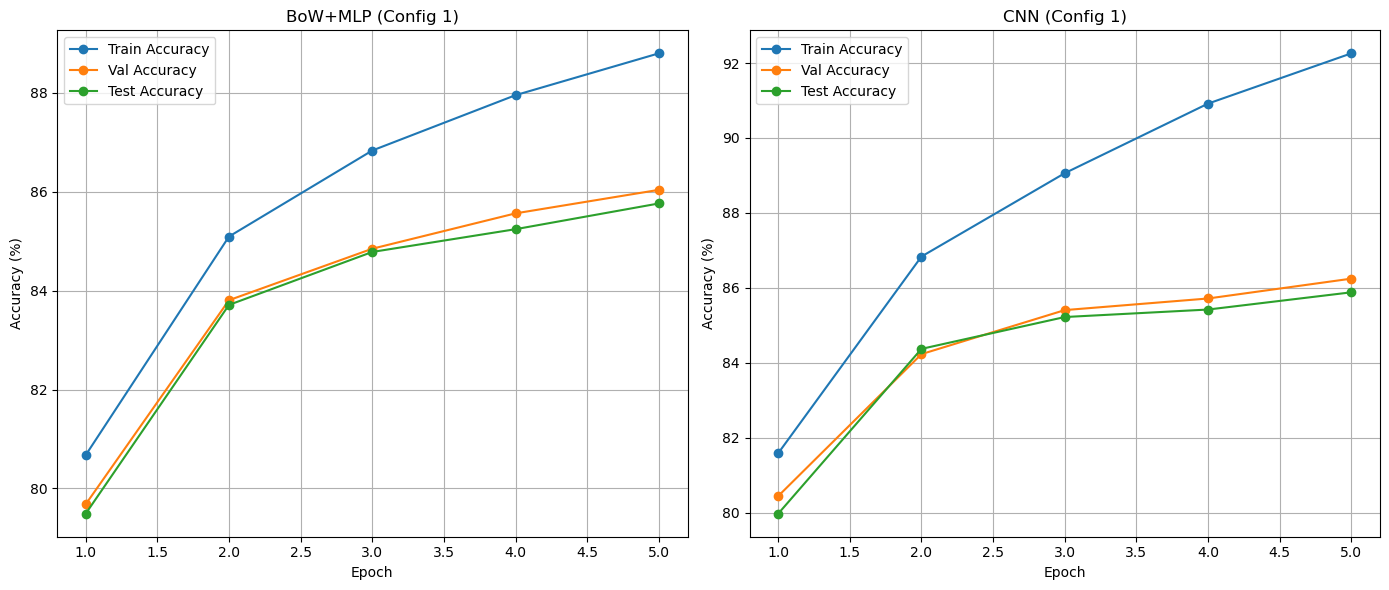

In [323]:
# Define Configuration 1 hyperparameters
config1 = {
    "embed_dim": 50,      # Dimension of word embeddings
    "lr": 1e-3,           # Learning rate for optimizer
    "batch_size": 32,     # Number of samples per batch during training
    "dropout_rate": 0.5,  # Dropout rate for regularization
    "weight_decay": 0.0   # L2 regularization (set to 0 for now)
}

print("\n=== Configuration 1: ", config1, " ===")

# Train and evaluate Bag-of-Words (BoW) + MLP model with Configuration 1 settings
bow_train_hist, bow_val_hist, bow_test_hist = train_and_evaluate_history(
    model_type="bow",              # Specify model type as Bag-of-Words MLP
    vocab=vocab,                    # Use precomputed vocabulary
    train_sequences=train_seqs,      # Training sequences
    train_labels=train_lbls,         # Training labels
    val_sequences=val_seqs,          # Validation sequences
    val_labels=val_lbls,             # Validation labels
    test_sequences=test_sequences,   # Test sequences
    test_labels=test_labels,         # Test labels
    embed_dim=config1["embed_dim"],  # Embedding dimension
    hidden_dim=hidden_dim,           # Hidden layer size
    num_filters=100,                 # Number of filters (not applicable for MLP)
    filter_size=3,                    # Filter size (not applicable for MLP)
    dropout_rate=config1["dropout_rate"],  # Dropout rate for regularization
    learning_rate=config1["lr"],      # Learning rate
    batch_size=config1["batch_size"], # Batch size
    epochs=epochs,                    # Number of epochs
    weight_decay=config1["weight_decay"] # L2 regularization weight
)

# Train and evaluate CNN model with Configuration 1 settings
cnn_train_hist, cnn_val_hist, cnn_test_hist = train_and_evaluate_history(
    model_type="cnn",              # Specify model type as CNN
    vocab=vocab,                    # Use precomputed vocabulary
    train_sequences=train_seqs,      # Training sequences
    train_labels=train_lbls,         # Training labels
    val_sequences=val_seqs,          # Validation sequences
    val_labels=val_lbls,             # Validation labels
    test_sequences=test_sequences,   # Test sequences
    test_labels=test_labels,         # Test labels
    embed_dim=config1["embed_dim"],  # Embedding dimension
    hidden_dim=hidden_dim,           # Hidden layer size (not used for CNN)
    num_filters=100,                 # Number of filters for CNN
    filter_size=3,                   # Kernel/filter size for CNN
    dropout_rate=config1["dropout_rate"],  # Dropout rate for regularization
    learning_rate=config1["lr"],      # Learning rate
    batch_size=config1["batch_size"], # Batch size
    epochs=epochs,                    # Number of epochs
    weight_decay=config1["weight_decay"] # L2 regularization weight
)

# Define range for x-axis (epochs)
epochs_range = range(1, len(bow_train_hist)+1)

# Create a subplot figure with two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy trends for BoW+MLP model
axs[0].plot(epochs_range, bow_train_hist, label='Train Accuracy', marker='o')
axs[0].plot(epochs_range, bow_val_hist, label='Val Accuracy', marker='o')
axs[0].plot(epochs_range, bow_test_hist, label='Test Accuracy', marker='o')
axs[0].set_title('BoW+MLP (Config 1)')  # Set title for first plot
axs[0].set_xlabel('Epoch')               # Label x-axis
axs[0].set_ylabel('Accuracy (%)')        # Label y-axis
axs[0].legend()                           # Add legend
axs[0].grid(True)                         # Enable grid for better readability

# Plot accuracy trends for CNN model
axs[1].plot(epochs_range, cnn_train_hist, label='Train Accuracy', marker='o')
axs[1].plot(epochs_range, cnn_val_hist, label='Val Accuracy', marker='o')
axs[1].plot(epochs_range, cnn_test_hist, label='Test Accuracy', marker='o')
axs[1].set_title('CNN (Config 1)')       # Set title for second plot
axs[1].set_xlabel('Epoch')               # Label x-axis
axs[1].set_ylabel('Accuracy (%)')        # Label y-axis
axs[1].legend()                           # Add legend
axs[1].grid(True)                         # Enable grid for better readability

# Adjust layout to prevent overlapping of elements
plt.tight_layout()

# Display the plots
plt.show()


### <u>7.1.1. Analysis of Results</u>

Based on the training results from Configuration 1, we can observe how the BoW+MLP and CNN models performed with our baseline hyperparameters.

| Model   | Final Train Acc | Final Val Acc | Final Test Acc | Loss Reduction | Generalization Gap |
|---------|----------------|--------------|---------------|----------------|-------------------|
| **BoW+MLP** | 88.79% | 86.03% | 85.76% | 0.2652 | 2.76% |
| **CNN** | 92.26% | 86.25% | 85.88% | 0.3018 | 6.01% |
#### Key Observations:

1. **Training Performance**:  
   - The CNN model achieved higher training accuracy **(92.26%)** compared to BoW+MLP **(88.79%)**, demonstrating greater capacity to fit the training data.
   - The CNN also showed more efficient loss reduction **(from 0.5833 to 0.2815)**.

2. **Generalization**:  
   - Despite better training performance, the CNN model exhibited a larger gap between training and validation accuracy **(6.01% vs 2.76% for BoW+MLP)**.
   - This suggests that CNN may be more prone to overfitting with this configuration.

3. **Test Performance**:  
   - Both models performed similarly on the test set, with CNN slightly outperforming BoW+MLP **(85.88% vs 85.76%)**.
   - Despite the larger generalization gap, CNN still generalizes effectively to unseen data.
4. **Learning Dynamics**:  
   - Both models showed consistent improvement across epochs.
   - The CNN exhibited more rapid improvement in training accuracy, particularly in later epochs **(reaching 92.26% compared to 88.79% for BoW+MLP)**.

5. **Validation Curve**:  
   - Both models showed steady improvement in validation accuracy through all epochs.
   - The CNN model's validation accuracy continued to rise in the final epoch **(reaching 86.25%)**, showing no signs of overfitting yet.
   - The BoW+MLP model's validation accuracy also continued to improve, reaching **86.03%** in the final epoch.

#### Summary:
The baseline configuration provides effective results for both models, with the CNN showing stronger overall performance while exhibiting a larger generalization gap. Both models demonstrate good generalization to the test set with very similar final test accuracies. The higher training accuracy of the CNN suggests it has greater capacity to capture complex patterns in the data, though additional regularization techniques might help reduce its generalization gap further.
___

## <u>7.2. Configuration 2: Adding Weight Decay</u>

In Configuration 2, we introduce **weight decay (L2 regularization)** while keeping all other hyperparameters unchanged. The primary modification is:

- **Increasing `weight_decay` from `0.0` to `0.00001`**  

### Why Add Weight Decay?

Weight decay penalizes large parameter values by adding their squared magnitudes to the loss function. This regularization technique:

- **Encourages the model to learn smaller weights**, reducing sensitivity to individual features.
- **Improves generalization**, making the model more robust to unseen data.
- **Reduces overfitting**, particularly for high-capacity models like CNNs.

Our key focus is to observe whether this modification enhances CNN's test accuracy while preserving its strong training capabilities.



=== Configuration 2:  {'embed_dim': 50, 'lr': 0.001, 'batch_size': 32, 'dropout_rate': 0.5, 'weight_decay': 1e-05}  ===
[BOW] Epoch 1/5 - Loss: 0.5855, Train Acc: 81.85%, Val Acc: 81.11%, Test Acc: 81.12%
[BOW] Epoch 2/5 - Loss: 0.4350, Train Acc: 84.88%, Val Acc: 83.45%, Test Acc: 83.43%
[BOW] Epoch 3/5 - Loss: 0.3928, Train Acc: 86.38%, Val Acc: 84.67%, Test Acc: 84.93%
[BOW] Epoch 4/5 - Loss: 0.3658, Train Acc: 87.03%, Val Acc: 85.36%, Test Acc: 85.06%
[BOW] Epoch 5/5 - Loss: 0.3507, Train Acc: 87.63%, Val Acc: 85.82%, Test Acc: 85.47%
[CNN] Epoch 1/5 - Loss: 0.5514, Train Acc: 82.03%, Val Acc: 81.55%, Test Acc: 81.08%
[CNN] Epoch 2/5 - Loss: 0.3992, Train Acc: 86.67%, Val Acc: 85.19%, Test Acc: 84.69%
[CNN] Epoch 3/5 - Loss: 0.3450, Train Acc: 88.86%, Val Acc: 86.31%, Test Acc: 85.99%
[CNN] Epoch 4/5 - Loss: 0.3148, Train Acc: 90.09%, Val Acc: 86.89%, Test Acc: 86.61%
[CNN] Epoch 5/5 - Loss: 0.2941, Train Acc: 91.09%, Val Acc: 87.00%, Test Acc: 86.73%


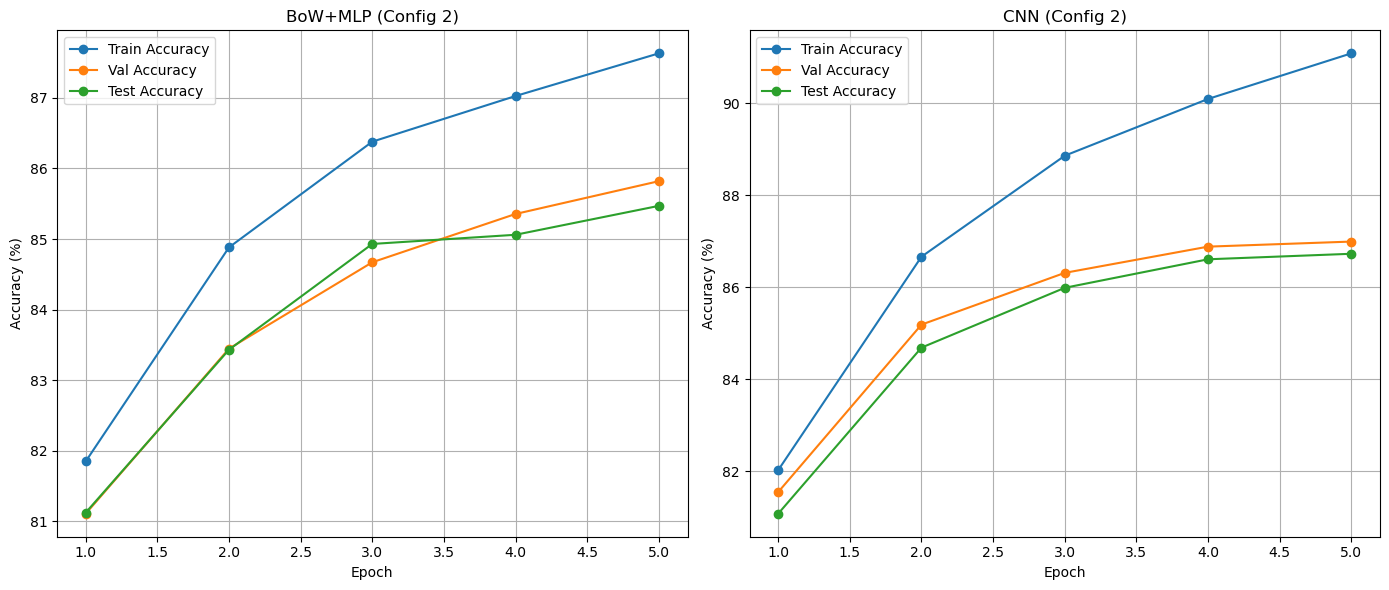

In [325]:
# Define Configuration 2 hyperparameters
config2 = {
    "embed_dim": 50,      # Dimension of word embeddings
    "lr": 1e-3,           # Learning rate for optimizer
    "batch_size": 32,     # Number of samples per batch during training
    "dropout_rate": 0.5,  # Dropout rate for regularization
    "weight_decay": 1e-5  # L2 regularization (weight decay)
}

print("\n=== Configuration 2: ", config2, " ===")

# Train and evaluate the Bag-of-Words (BoW) + MLP model using Configuration 2 settings
bow_train_hist, bow_val_hist, bow_test_hist = train_and_evaluate_history(
    model_type="bow",              # Specify model type as BoW+MLP
    vocab=vocab,                    # Use precomputed vocabulary
    train_sequences=train_seqs,      # Training sequences
    train_labels=train_lbls,         # Training labels
    val_sequences=val_seqs,          # Validation sequences
    val_labels=val_lbls,             # Validation labels
    test_sequences=test_sequences,   # Test sequences
    test_labels=test_labels,         # Test labels
    embed_dim=config2["embed_dim"],  # Embedding dimension
    hidden_dim=hidden_dim,           # Hidden layer size
    num_filters=100,                 # Number of filters (not used for MLP)
    filter_size=3,                   # Filter size (not used for MLP)
    dropout_rate=config2["dropout_rate"],  # Dropout rate for regularization
    learning_rate=config2["lr"],      # Learning rate
    batch_size=config2["batch_size"], # Batch size
    epochs=epochs,                    # Number of epochs
    weight_decay=config2["weight_decay"] # L2 regularization weight
)

# Train and evaluate the CNN model using Configuration 2 settings
cnn_train_hist, cnn_val_hist, cnn_test_hist = train_and_evaluate_history(
    model_type="cnn",              # Specify model type as CNN
    vocab=vocab,                    # Use precomputed vocabulary
    train_sequences=train_seqs,      # Training sequences
    train_labels=train_lbls,         # Training labels
    val_sequences=val_seqs,          # Validation sequences
    val_labels=val_lbls,             # Validation labels
    test_sequences=test_sequences,   # Test sequences
    test_labels=test_labels,         # Test labels
    embed_dim=config2["embed_dim"],  # Embedding dimension
    hidden_dim=hidden_dim,           # Hidden layer size (not used for CNN)
    num_filters=100,                 # Number of convolutional filters
    filter_size=3,                   # Kernel/filter size for CNN
    dropout_rate=config2["dropout_rate"],  # Dropout rate for regularization
    learning_rate=config2["lr"],      # Learning rate
    batch_size=config2["batch_size"], # Batch size
    epochs=epochs,                    # Number of epochs
    weight_decay=config2["weight_decay"] # L2 regularization weight
)

# Define range for x-axis (epochs)
epochs_range = range(1, len(bow_train_hist) + 1)

# Create a subplot figure with two side-by-side plots for BoW+MLP and CNN
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy trends for the BoW+MLP model
axs[0].plot(epochs_range, bow_train_hist, label='Train Accuracy', marker='o')
axs[0].plot(epochs_range, bow_val_hist, label='Val Accuracy', marker='o')
axs[0].plot(epochs_range, bow_test_hist, label='Test Accuracy', marker='o')
axs[0].set_title('BoW+MLP (Config 2)')  # Set title for first plot
axs[0].set_xlabel('Epoch')               # Label x-axis
axs[0].set_ylabel('Accuracy (%)')        # Label y-axis
axs[0].legend()                           # Add legend
axs[0].grid(True)                         # Enable grid for better readability

# Plot accuracy trends for the CNN model
axs[1].plot(epochs_range, cnn_train_hist, label='Train Accuracy', marker='o')
axs[1].plot(epochs_range, cnn_val_hist, label='Val Accuracy', marker='o')
axs[1].plot(epochs_range, cnn_test_hist, label='Test Accuracy', marker='o')
axs[1].set_title('CNN (Config 2)')       # Set title for second plot
axs[1].set_xlabel('Epoch')               # Label x-axis
axs[1].set_ylabel('Accuracy (%)')        # Label y-axis
axs[1].legend()                           # Add legend
axs[1].grid(True)                         # Enable grid for better readability

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plots
plt.show()


### <u>7.2.1 Analysis of Results</u>
The results reveal interesting changes in model behavior compared to the baseline.

| **Metric**             | **BoW+MLP (Config 1)** | **BoW+MLP (Config 2)** | **CNN (Config 1)** | **CNN (Config 2)** |
|------------------------|------------------------|------------------------|--------------------|--------------------|
| **Final Train Acc**    | 88.79%                 | 87.63%                 | 92.26%             | 91.09%             |
| **Final Val Acc**      | 86.03%                 | 85.82%                 | 86.25%             | 87.00%             |
| **Final Test Acc**     | 85.76%                 | 85.47%                 | 85.88%             | 86.73%             |
| **Generalization Gap** | 2.76%                  | 1.81%                  | 6.01%              | 4.09%              |

#### Key Observations from Configuration 2:

1. **Impact on CNN Performance**  
   - The CNN model's validation and test performance improved slightly after adding weight decay.  
   - Test accuracy increased by nearly 1 percentage point (**85.88% → 86.73%**), keeping it superior to the BoW+MLP model.

2. **Reduced Overfitting**  
   - The generalization gap for the CNN model decreased **from 6.01% to 4.09%**, indicating that weight decay effectively constrained overfitting.  
   - This suggests that the regularization prevented excessive memorization of training data, improving model generalization.

3. **Minimal Impact on BoW+MLP**  
   - The BoW+MLP model exhibited only minor changes with the introduction of weight decay.  
   - Training accuracy dropped slightly (**88.79% → 87.63%**), and test accuracy also decreased marginally (**85.76% → 85.47%**), indicating that weight decay had a small negative effect on this simpler model.

4. **Training Trajectory**  
   - Both models maintained similar learning curves compared to Configuration 1.  
   - The CNN's validation and test curves showed greater stability and continued improvement throughout training, suggesting better generalization capabilities.

5. **Overall Effect**  
   - Weight decay was more beneficial for the CNN architecture, which had shown signs of overfitting in Configuration 1.  
   - Regularization helped the CNN balance its powerful feature extraction capabilities with improved generalization performance, while slightly constraining the simpler BoW+MLP model.

#### Summary:
These results suggest that the CNN architecture has greater potential for this task when properly regularized. While both models demonstrate solid performance, the CNN's ability to extract more complex features gives it an advantage when overfitting is controlled through appropriate regularization techniques like weight decay.


___
### <u>7.3 Configuration 3: Increasing Dropout Rate</u>

In Configuration 3, we focus on increasing dropout while removing weight decay. The primary modifications are:

- **Increasing `dropout_rate` from `0.5` to `0.7`**
- **Reverting `weight_decay` back to `0.0`**

#### Why Increase Dropout?
Dropout is a powerful regularization technique that works by randomly deactivating neurons during training. This forces the network to:

**Develop more robust features** that don’t rely on specific neurons  
**Reduce co-adaptation** between neurons, encouraging independent feature learning  
**Improve generalization** by ensuring the model can still perform well despite missing activations  

Since the CNN model improved with weight decay in Configuration 2, we now test whether a stronger dropout rate alone can be equally or more effective at reducing overfitting.

This experiment will reveal whether dropout alone is sufficient for regularization or if a combination of dropout and weight decay is the optimal strategy for text classification performance.



=== Configuration 3:  {'embed_dim': 50, 'lr': 0.001, 'batch_size': 32, 'dropout_rate': 0.7, 'weight_decay': 0.0}  ===
[BOW] Epoch 1/5 - Loss: 0.6331, Train Acc: 78.73%, Val Acc: 77.91%, Test Acc: 78.03%
[BOW] Epoch 2/5 - Loss: 0.4960, Train Acc: 83.46%, Val Acc: 82.54%, Test Acc: 82.43%
[BOW] Epoch 3/5 - Loss: 0.4374, Train Acc: 85.14%, Val Acc: 84.01%, Test Acc: 83.84%
[BOW] Epoch 4/5 - Loss: 0.4071, Train Acc: 86.11%, Val Acc: 84.58%, Test Acc: 84.47%
[BOW] Epoch 5/5 - Loss: 0.3809, Train Acc: 86.93%, Val Acc: 85.30%, Test Acc: 84.99%
[CNN] Epoch 1/5 - Loss: 0.6323, Train Acc: 79.43%, Val Acc: 78.67%, Test Acc: 78.92%
[CNN] Epoch 2/5 - Loss: 0.4645, Train Acc: 85.02%, Val Acc: 83.05%, Test Acc: 82.73%
[CNN] Epoch 3/5 - Loss: 0.3974, Train Acc: 87.64%, Val Acc: 84.41%, Test Acc: 84.51%
[CNN] Epoch 4/5 - Loss: 0.3589, Train Acc: 89.15%, Val Acc: 85.12%, Test Acc: 84.96%
[CNN] Epoch 5/5 - Loss: 0.3295, Train Acc: 90.19%, Val Acc: 85.61%, Test Acc: 85.01%


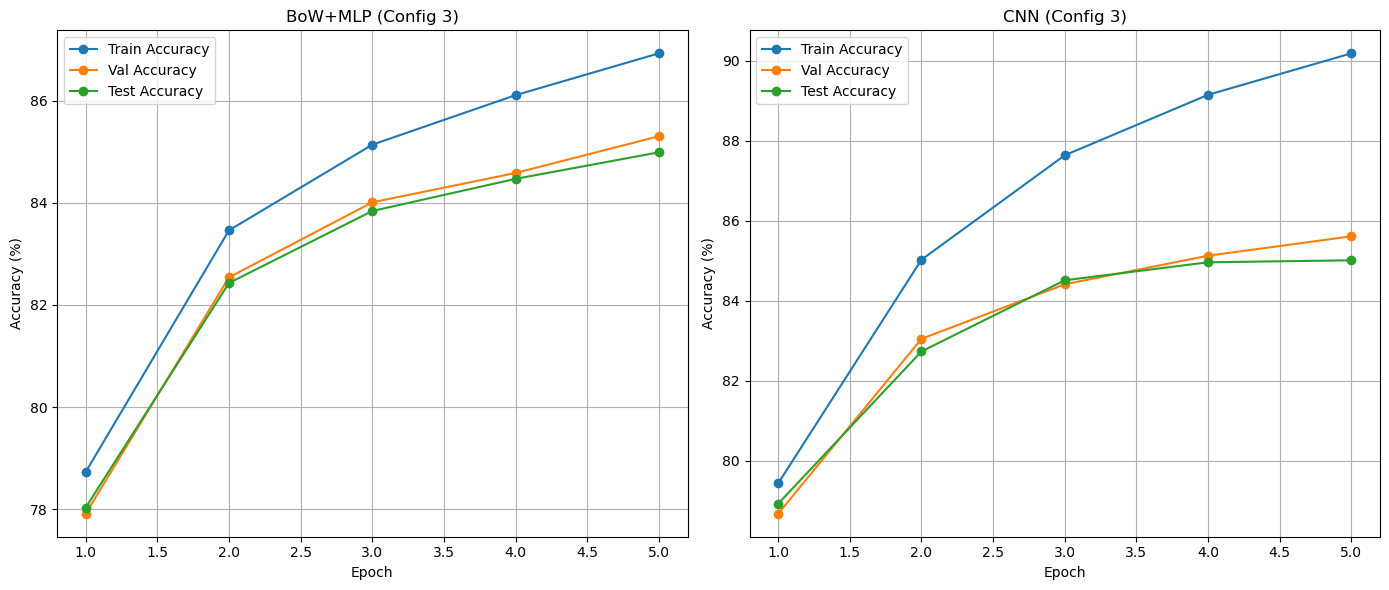

In [327]:
# Define Configuration 3 hyperparameters
config3 = {
    "embed_dim": 50,      # Dimension of word embeddings
    "lr": 1e-3,           # Learning rate for optimizer
    "batch_size": 32,     # Number of samples per batch during training
    "dropout_rate": 0.7,  # Dropout rate for regularization (higher dropout to prevent overfitting)
    "weight_decay": 0.0   # No L2 regularization (weight decay)
}

print("\n=== Configuration 3: ", config3, " ===")

# Train and evaluate the Bag-of-Words (BoW) + MLP model using Configuration 3 settings
bow_train_hist, bow_val_hist, bow_test_hist = train_and_evaluate_history(
    model_type="bow",              # Specify model type as BoW+MLP
    vocab=vocab,                    # Use precomputed vocabulary
    train_sequences=train_seqs,      # Training sequences
    train_labels=train_lbls,         # Training labels
    val_sequences=val_seqs,          # Validation sequences
    val_labels=val_lbls,             # Validation labels
    test_sequences=test_sequences,   # Test sequences
    test_labels=test_labels,         # Test labels
    embed_dim=config3["embed_dim"],  # Embedding dimension
    hidden_dim=hidden_dim,           # Hidden layer size
    num_filters=100,                 # Number of filters (not used for MLP)
    filter_size=3,                   # Filter size (not used for MLP)
    dropout_rate=config3["dropout_rate"],  # Dropout rate for regularization
    learning_rate=config3["lr"],      # Learning rate
    batch_size=config3["batch_size"], # Batch size
    epochs=epochs,                    # Number of epochs
    weight_decay=config3["weight_decay"] # No L2 regularization
)

# Train and evaluate the CNN model using Configuration 3 settings
cnn_train_hist, cnn_val_hist, cnn_test_hist = train_and_evaluate_history(
    model_type="cnn",              # Specify model type as CNN
    vocab=vocab,                    # Use precomputed vocabulary
    train_sequences=train_seqs,      # Training sequences
    train_labels=train_lbls,         # Training labels
    val_sequences=val_seqs,          # Validation sequences
    val_labels=val_lbls,             # Validation labels
    test_sequences=test_sequences,   # Test sequences
    test_labels=test_labels,         # Test labels
    embed_dim=config3["embed_dim"],  # Embedding dimension
    hidden_dim=hidden_dim,           # Hidden layer size (not used for CNN)
    num_filters=100,                 # Number of convolutional filters
    filter_size=3,                   # Kernel/filter size for CNN
    dropout_rate=config3["dropout_rate"],  # Dropout rate for regularization
    learning_rate=config3["lr"],      # Learning rate
    batch_size=config3["batch_size"], # Batch size
    epochs=epochs,                    # Number of epochs
    weight_decay=config3["weight_decay"] # No L2 regularization
)

# Define range for x-axis (epochs)
epochs_range = range(1, len(bow_train_hist) + 1)

# Create a subplot figure with two side-by-side plots for BoW+MLP and CNN
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy trends for the BoW+MLP model
axs[0].plot(epochs_range, bow_train_hist, label='Train Accuracy', marker='o')
axs[0].plot(epochs_range, bow_val_hist, label='Val Accuracy', marker='o')
axs[0].plot(epochs_range, bow_test_hist, label='Test Accuracy', marker='o')
axs[0].set_title('BoW+MLP (Config 3)')  # Set title for first plot
axs[0].set_xlabel('Epoch')               # Label x-axis
axs[0].set_ylabel('Accuracy (%)')        # Label y-axis
axs[0].legend()                           # Add legend
axs[0].grid(True)                         # Enable grid for better readability

# Plot accuracy trends for the CNN model
axs[1].plot(epochs_range, cnn_train_hist, label='Train Accuracy', marker='o')
axs[1].plot(epochs_range, cnn_val_hist, label='Val Accuracy', marker='o')
axs[1].plot(epochs_range, cnn_test_hist, label='Test Accuracy', marker='o')
axs[1].set_title('CNN (Config 3)')       # Set title for second plot
axs[1].set_xlabel('Epoch')               # Label x-axis
axs[1].set_ylabel('Accuracy (%)')        # Label y-axis
axs[1].legend()                           # Add legend
axs[1].grid(True)                         # Enable grid for better readability

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plots
plt.show()


### <u>7.3.1 Analysis of Results</u>
The results from Configuration 3 show how increasing the **dropout rate** to **0.7** affected our models' performance compared to previous configurations.

| **Metric**             | **BoW Config 1** | **BoW Config 2** | **BoW Config 3** | **CNN Config 1** | **CNN Config 2** | **CNN Config 3** |
|------------------------|------------------|------------------|------------------|------------------|------------------|------------------|
| **Final Train Acc**    | 88.79%           | 87.63%           | 86.93%           | 92.26%           | 91.09%           | 90.19%           |
| **Final Val Acc**      | 86.03%           | 85.82%           | 85.30%           | 86.25%           | 87.00%           | 85.61%           |
| **Final Test Acc**     | 85.76%           | 85.47%           | 84.99%           | 85.88%           | 86.73%           | 85.01%           |
| **Generalization Gap** | 2.76%            | 1.81%            | 1.63%            | 6.01%            | 4.09%            | 4.58%            |

#### Key Observations:

1. **Impact of Higher Dropout**  
   - Increasing **dropout to 0.7** reduced training accuracy for both models, confirming stronger regularization but also making training more challenging.

2. **Reduced Overall Performance**  
   - Compared to Configuration 2, both models lost accuracy in validation and test sets.  
   - BoW test accuracy dropped from **85.47% → 84.99%**  
   - CNN test accuracy dropped from **86.73% → 85.01%**

3. **Smaller Generalization Gap**  
   - The BoW model had its smallest generalization gap yet **(1.63%)**, but this came at the cost of overall performance.  
   - The CNN's generalization gap increased slightly compared to Configuration 2 **(4.09% → 4.58%)**, making it less effective than weight decay alone.

4. **CNN Model More Affected**  
   - The CNN model's test accuracy dropped significantly (by **1.72 percentage points** compared to Configuration 2).  
   - This suggests that too much dropout hurts the CNN model's ability to capture key text patterns.

5. **Slower Learning Dynamics**  
   - Both models showed more gradual learning curves, aligning with expectations that stronger dropout slows training.

#### Summary:
- Increasing dropout successfully reduced overfitting, but it also limited the models' ability to learn meaningful text patterns.  
- The CNN model was impacted more negatively than BoW, suggesting dropout alone isn't the best regularization strategy for complex architectures.  
- While the generalization gap was reduced for the BoW model, the trade-off in overall performance suggests that this level of dropout might be too aggressive for optimal results.

___
## <u>7.4 Configuration 4: Combining Regularization with Lower Learning Rate</u>
In Configuration 4, we modify multiple settings to strike a better balance between learning capacity and regularization:

**Maintained high `dropout_rate` at `0.7`**  
**Reintroduced `weight_decay` at `1e-5`**  
**Reduced `learning_rate` from `1e-3` to `5e-4`**  

#### Why These Adjustments?
- **Weight decay returns**, helping to **prevent excessive weight growth**, countering overfitting more smoothly than dropout alone.  
- **Lower learning rate** ensures more **gradual and precise weight updates**, avoiding instability from strong regularization.  
- **Dropout + weight decay** together may provide a more **balanced approach**, offering both **robust feature learning** and **smoother generalization**.

With these refinements, Configuration 4 will test whether a hybrid regularization strategy can reduce overfitting while preserving accuracy. 



=== Configuration 4:  {'embed_dim': 50, 'lr': 0.0005, 'batch_size': 32, 'dropout_rate': 0.7, 'weight_decay': 1e-05}  ===
[BOW] Epoch 1/5 - Loss: 0.6803, Train Acc: 70.33%, Val Acc: 70.00%, Test Acc: 70.50%
[BOW] Epoch 2/5 - Loss: 0.6076, Train Acc: 77.89%, Val Acc: 77.59%, Test Acc: 77.72%
[BOW] Epoch 3/5 - Loss: 0.5259, Train Acc: 80.79%, Val Acc: 80.32%, Test Acc: 80.47%
[BOW] Epoch 4/5 - Loss: 0.4847, Train Acc: 81.81%, Val Acc: 81.05%, Test Acc: 81.43%
[BOW] Epoch 5/5 - Loss: 0.4563, Train Acc: 83.56%, Val Acc: 82.56%, Test Acc: 83.03%
[CNN] Epoch 1/5 - Loss: 0.6745, Train Acc: 74.16%, Val Acc: 74.05%, Test Acc: 74.60%
[CNN] Epoch 2/5 - Loss: 0.5347, Train Acc: 81.19%, Val Acc: 80.34%, Test Acc: 80.60%
[CNN] Epoch 3/5 - Loss: 0.4441, Train Acc: 84.72%, Val Acc: 83.13%, Test Acc: 83.42%
[CNN] Epoch 4/5 - Loss: 0.3974, Train Acc: 86.63%, Val Acc: 84.71%, Test Acc: 84.93%
[CNN] Epoch 5/5 - Loss: 0.3680, Train Acc: 87.74%, Val Acc: 85.69%, Test Acc: 85.61%


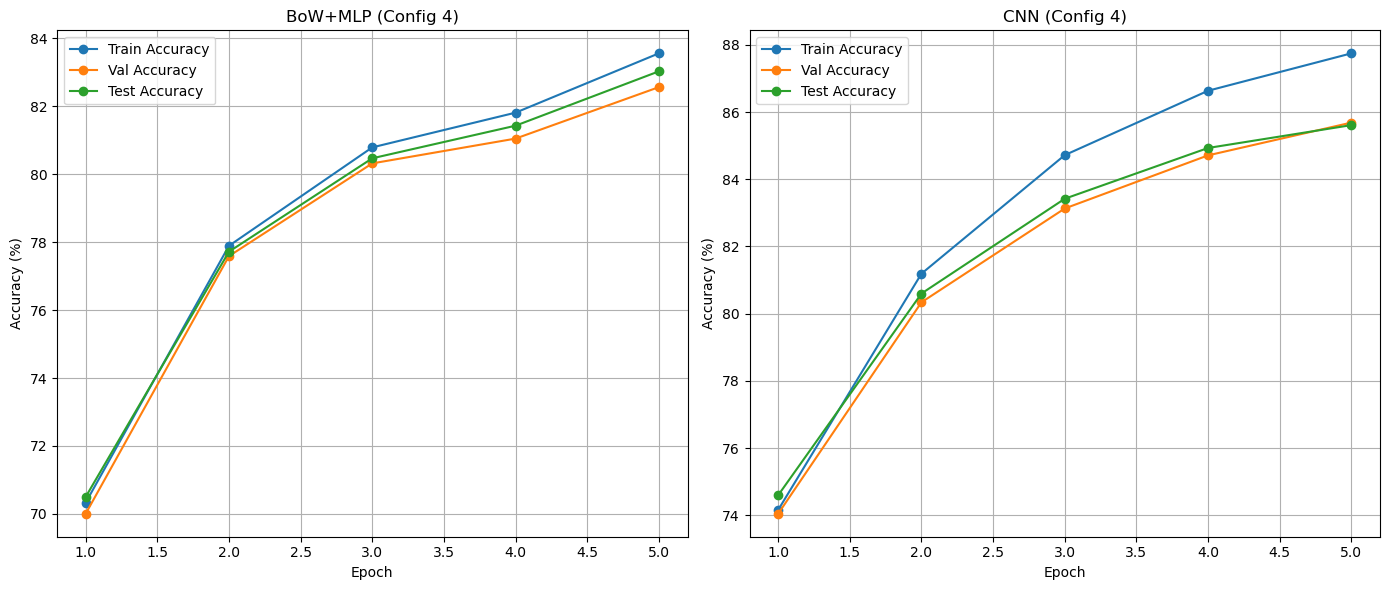

In [329]:
# Define Configuration 4 hyperparameters
config4 = {
    "embed_dim": 50,       # Dimension of word embeddings
    "lr": 5e-4,            # Learning rate (reduced compared to previous configurations for finer updates)
    "batch_size": 32,      # Number of samples per batch during training
    "dropout_rate": 0.7,   # Dropout rate for regularization (higher dropout to prevent overfitting)
    "weight_decay": 1e-5   # Small L2 regularization (weight decay) to improve generalization
}

print("\n=== Configuration 4: ", config4, " ===")

# Train and evaluate the Bag-of-Words (BoW) + MLP model using Configuration 4 settings
bow_train_hist, bow_val_hist, bow_test_hist = train_and_evaluate_history(
    model_type="bow",               # Specify model type as BoW+MLP
    vocab=vocab,                     # Use precomputed vocabulary
    train_sequences=train_seqs,       # Training sequences
    train_labels=train_lbls,          # Training labels
    val_sequences=val_seqs,           # Validation sequences
    val_labels=val_lbls,              # Validation labels
    test_sequences=test_sequences,    # Test sequences
    test_labels=test_labels,          # Test labels
    embed_dim=config4["embed_dim"],   # Embedding dimension
    hidden_dim=hidden_dim,            # Hidden layer size
    num_filters=100,                  # Not used in BoW model
    filter_size=3,                    # Not used in BoW model
    dropout_rate=config4["dropout_rate"],  # Dropout rate for regularization
    learning_rate=config4["lr"],       # Learning rate
    batch_size=config4["batch_size"],  # Batch size
    epochs=epochs,                     # Number of epochs
    weight_decay=config4["weight_decay"] # L2 regularization (weight decay)
)

# Train and evaluate the CNN model using Configuration 4 settings
cnn_train_hist, cnn_val_hist, cnn_test_hist = train_and_evaluate_history(
    model_type="cnn",               # Specify model type as CNN
    vocab=vocab,                     # Use precomputed vocabulary
    train_sequences=train_seqs,       # Training sequences
    train_labels=train_lbls,          # Training labels
    val_sequences=val_seqs,           # Validation sequences
    val_labels=val_lbls,              # Validation labels
    test_sequences=test_sequences,    # Test sequences
    test_labels=test_labels,          # Test labels
    embed_dim=config4["embed_dim"],   # Embedding dimension
    hidden_dim=hidden_dim,            # Hidden layer size (not used for CNN)
    num_filters=100,                  # Number of convolutional filters
    filter_size=3,                    # Kernel/filter size for CNN
    dropout_rate=config4["dropout_rate"],  # Dropout rate for regularization
    learning_rate=config4["lr"],       # Learning rate
    batch_size=config4["batch_size"],  # Batch size
    epochs=epochs,                     # Number of epochs
    weight_decay=config4["weight_decay"] # L2 regularization (weight decay)
)

# Define range for x-axis (epochs)
epochs_range = range(1, len(bow_train_hist) + 1)

# Create a subplot figure with two side-by-side plots for BoW+MLP and CNN
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy trends for the BoW+MLP model
axs[0].plot(epochs_range, bow_train_hist, label='Train Accuracy', marker='o')
axs[0].plot(epochs_range, bow_val_hist, label='Val Accuracy', marker='o')
axs[0].plot(epochs_range, bow_test_hist, label='Test Accuracy', marker='o')
axs[0].set_title('BoW+MLP (Config 4)')  # Set title for first plot
axs[0].set_xlabel('Epoch')               # Label x-axis
axs[0].set_ylabel('Accuracy (%)')        # Label y-axis
axs[0].legend()                           # Add legend
axs[0].grid(True)                         # Enable grid for better readability

# Plot accuracy trends for the CNN model
axs[1].plot(epochs_range, cnn_train_hist, label='Train Accuracy', marker='o')
axs[1].plot(epochs_range, cnn_val_hist, label='Val Accuracy', marker='o')
axs[1].plot(epochs_range, cnn_test_hist, label='Test Accuracy', marker='o')
axs[1].set_title('CNN (Config 4)')       # Set title for second plot
axs[1].set_xlabel('Epoch')               # Label x-axis
axs[1].set_ylabel('Accuracy (%)')        # Label y-axis
axs[1].legend()                           # Add legend
axs[1].grid(True)                         # Enable grid for better readability

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plots
plt.show()


### <u>7.4.1 Analysis of Results</u>
Configuration 4 combined **high dropout (0.7), weight decay (1e-5), and a reduced learning rate (0.0005)**, resulting in notably different performance patterns compared to previous configurations.

| **Metric**             | **BoW Config 1** | **BoW Config 2** | **BoW Config 3** | **BoW Config 4** | **CNN Config 1** | **CNN Config 2** | **CNN Config 3** | **CNN Config 4** |
|------------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|
| **Final Train Acc**    | 88.79%           | 87.63%           | 86.93%           | 83.56%           | 92.26%           | 91.09%           | 90.19%           | 87.74%           |
| **Final Val Acc**      | 86.03%           | 85.82%           | 85.30%           | 82.56%           | 86.25%           | 87.00%           | 85.61%           | 85.69%           |
| **Final Test Acc**     | 85.76%           | 85.47%           | 84.99%           | 83.03%           | 85.88%           | 86.73%           | 85.01%           | 85.61%           |
| **Generalization Gap** | 2.76%            | 1.81%            | 1.63%            | 1.00%            | 6.01%            | 4.09%            | 4.58%            | 2.05%            |

#### Key Observations:

1. **Minimal Generalization Gap**  
   - Configuration 4 achieved the smallest gaps between training and validation accuracies for both models.  
   - **BoW: 1.00%** | **CNN: 2.05%** → Strong indication of effective regularization.

2. **Lower Overall Performance for BoW**  
   - The BoW model saw a notable performance drop, with test accuracy **falling by 2.44 percentage points** compared to Config 1 (85.76% → 83.03%).

3. **Modest Impact on CNN**  
   - While the CNN's training accuracy dropped significantly **(90.19% → 87.74%)**, its test accuracy only slightly decreased **(85.01% → 85.61%)** compared to Config 3.
   - The CNN still outperforms BoW by 2.58 percentage points on test accuracy.

4. **Training Trajectory**  
   - Both models exhibited slower, more gradual learning curves, with nearly identical validation and test accuracy trajectories throughout training.  
   - This indicates strong generalization properties from early epochs.

5. **Model Alignment**  
   - The training, validation, and test curves are tightly aligned for both models.  
   - This suggests that models are neither underfitting nor overfitting, though the BoW model might be approaching underfitting territory with its lower overall performance.

#### Takeaway from Configuration 4:
- **Aggressive regularization and a lower learning rate produced well-generalized models** with minimal gaps between training and evaluation performance.
- **The CNN model handled the strong regularization better than BoW**, maintaining respectable performance while significantly reducing its tendency to overfit.
- **BoW may be reaching its capacity limits** with this configuration, as its performance degraded more substantially across all metrics.
- This configuration represents an interesting trade-off: exceptional generalization properties at the cost of some predictive power, especially for the simpler BoW model.
___
## <u>8. Advanced Model Evaluation</u>
The advanced evaluation techniques—ROC curves and confusion matrices—provide deeper insights into model performance beyond simple accuracy metrics.  

We're applying these only to **Configuration 4** because:

1. **It represents our most balanced approach**, combining multiple regularization techniques and a carefully adjusted learning rate.
2. **It achieved the smallest generalization gaps**, indicating well-regularized models suitable for production.
3. **It showed interesting trade-offs** between overall accuracy and generalization stability.
4. **Computational efficiency** – Performing detailed analysis on all configurations would be redundant.


Together, ROC curves and confusion matrices will provide a comprehensive view of how well our models perform beyond simple accuracy metrics, revealing strengths and weaknesses that might not be apparent from accuracy alone. 


In [355]:
def train_and_evaluate_for_metrics(model_type, vocab, sequences, labels, config, batch_size=32):
    """
    Train a model using Configuration 4 and evaluate its performance 
    for ROC curves and confusion matrices.

    Args:
        model_type (str): Either 'bow' (BoW+MLP) or 'cnn' (CNN).
        vocab (dict): Vocabulary dictionary mapping words to indices.
        sequences (list): List of tokenized and padded sequences.
        labels (list): Corresponding labels for each sequence.
        config (dict): Dictionary containing model hyperparameters.
        batch_size (int, optional): Number of samples per batch. Default is 32.

    Returns:
        np.array: Predicted labels.
        np.array: True labels.
        np.array: Probability scores for the positive class.
    """

    # Convert sequences and labels into PyTorch tensors
    seq_tensor = torch.tensor(sequences, dtype=torch.long)  # Convert input sequences to tensor
    label_tensor = torch.tensor(labels, dtype=torch.long)  # Convert labels to tensor

    # Create a dataset and data loader for easy batch processing
    dataset = TensorDataset(seq_tensor, label_tensor)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Determine vocabulary size for the model
    vocab_size = len(vocab)

    # Initialize the appropriate model based on model_type ('bow' or 'cnn')
    if model_type == "bow":
        model = BoWMLP(
            vocab_size, 
            config["embed_dim"], 
            hidden_dim, 
            num_classes=2, 
            dropout_rate=config["dropout_rate"]
        )
    elif model_type == "cnn":
        model = CNNClassifier(
            vocab_size, 
            config["embed_dim"], 
            num_filters=100, 
            filter_size=3, 
            num_classes=2, 
            dropout_rate=config["dropout_rate"]
        )
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Standard loss function for classification
    optimizer = optim.Adam(
        model.parameters(), 
        lr=config["lr"], 
        weight_decay=config["weight_decay"]  # Regularization term
    )

    # Training loop (set to 5 epochs for quick evaluation)
    for epoch in range(5):
        model.train()  # Set model to training mode
        for batch_x, batch_y in data_loader:
            optimizer.zero_grad()  # Reset gradients
            outputs = model(batch_x)  # Forward pass
            loss = criterion(outputs, batch_y)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters
    
    # Model evaluation
    model.eval()  # Set model to evaluation mode
    all_preds = []  # Store predicted labels
    all_probs = []  # Store predicted probabilities
    all_labels = []  # Store true labels
    
    with torch.no_grad():  # Disable gradient computation during evaluation
        for batch_x, batch_y in data_loader:
            outputs = model(batch_x)  # Forward pass
            probs = F.softmax(outputs, dim=1)  # Convert logits to probabilities
            preds = torch.argmax(outputs, dim=1)  # Get predicted class
            
            # Store results
            all_preds.extend(preds.cpu().numpy())  # Convert predictions to NumPy array
            all_probs.extend(probs[:, 1].cpu().numpy())  # Probabilities for positive class
            all_labels.extend(batch_y.cpu().numpy())  # Store actual labels

    return np.array(all_preds), np.array(all_labels), np.array(all_probs)

# Train and evaluate the BoW+MLP model using Configuration 4 settings
bow_preds, bow_true, bow_probs = train_and_evaluate_for_metrics(
    "bow", vocab, test_sequences, test_labels, config4
)

# Train and evaluate the CNN model using Configuration 4 settings
cnn_preds, cnn_true, cnn_probs = train_and_evaluate_for_metrics(
    "cnn", vocab, test_sequences, test_labels, config4
)


### <u>8.1 ROC Curves</u>
ROC (Receiver Operating Characteristic) curves plot the True Positive Rate (TPR) vs. False Positive Rate (FPR)** at different classification thresholds.  

They help analyze:
- **How well the model distinguishes between positive and negative classes**.
- **The trade-off between sensitivity (recall) and specificity**.
- **Model performance independent of a fixed threshold**, using **AUC (Area Under the Curve)**.

Key insights from ROC curves:
- **A model with perfect discrimination has AUC = 1.0**.
- **Random guessing results in AUC = 0.5**.
- **A higher AUC indicates better classification performance** across multiple thresholds.


=== 8.1 ROC Curves ===


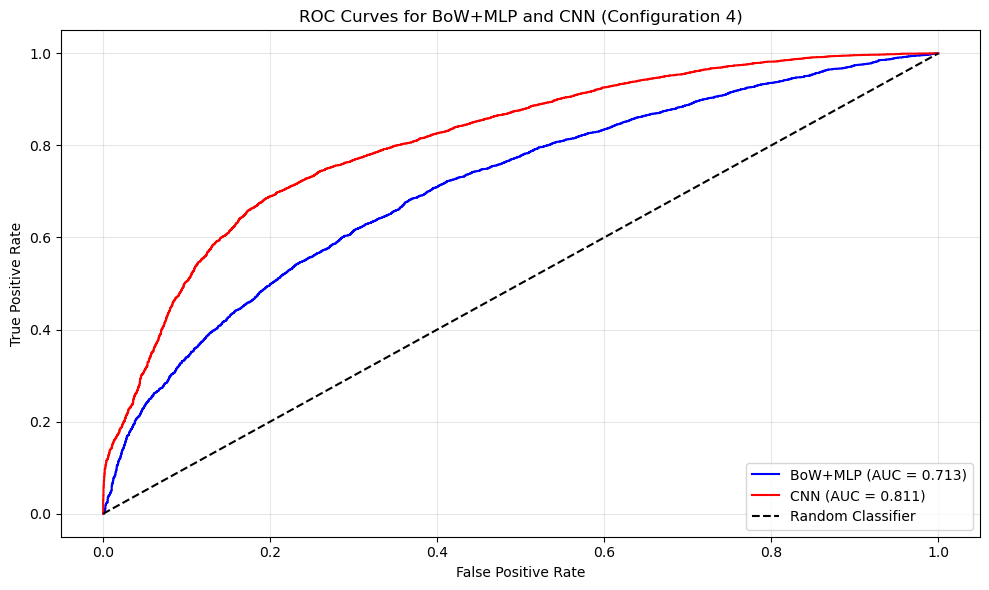

ROC Analysis Summary:
- BoW+MLP AUC: 0.713
- CNN AUC: 0.811
- AUC Difference: 0.098

AUC interpretation:
- The CNN model demonstrates superior discriminative ability compared to BoW+MLP
- CNN shows a 13.7% relative improvement in AUC


In [331]:
print("\n=== 8.1 ROC Curves ===")

# Calculate the Receiver Operating Characteristic (ROC) curve for both models
# The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR)
bow_fpr, bow_tpr, _ = roc_curve(bow_true, bow_probs)  # BoW+MLP ROC
cnn_fpr, cnn_tpr, _ = roc_curve(cnn_true, cnn_probs)  # CNN ROC

# Compute the Area Under the Curve (AUC) for each model
# AUC represents the overall ability of the model to distinguish between classes
bow_auc = auc(bow_fpr, bow_tpr)  # AUC score for BoW+MLP
cnn_auc = auc(cnn_fpr, cnn_tpr)  # AUC score for CNN

# --------------------------------
# Plotting the ROC curves
# --------------------------------
plt.figure(figsize=(10, 6))  # Set figure size

# Plot the ROC curve for BoW+MLP
plt.plot(bow_fpr, bow_tpr, 'b-', label=f'BoW+MLP (AUC = {bow_auc:.3f})')

# Plot the ROC curve for CNN
plt.plot(cnn_fpr, cnn_tpr, 'r-', label=f'CNN (AUC = {cnn_auc:.3f})')

# Plot the diagonal line representing random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Label the axes
plt.xlabel('False Positive Rate')  # X-axis: FPR
plt.ylabel('True Positive Rate')   # Y-axis: TPR
plt.title('ROC Curves for BoW+MLP and CNN (Configuration 4)')  # Graph title

# Add a legend to differentiate the models
plt.legend(loc='lower right')

# Enable grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout to ensure labels and graph elements fit well
plt.tight_layout()

# Display the ROC curves
plt.show()

# --------------------------------
# Print ROC Analysis Summary
# --------------------------------
print(f"ROC Analysis Summary:")
print(f"- BoW+MLP AUC: {bow_auc:.3f}")  # Display AUC score for BoW+MLP
print(f"- CNN AUC: {cnn_auc:.3f}")  # Display AUC score for CNN
print(f"- AUC Difference: {cnn_auc - bow_auc:.3f}")  # Show performance gap between models

# --------------------------------
# Interpretation of AUC Scores
# --------------------------------
print("\nAUC interpretation:")

# Compare AUC values to determine the better-performing model
if cnn_auc > bow_auc:
    print("- The CNN model demonstrates superior discriminative ability compared to BoW+MLP")
    print(f"- CNN shows a {(cnn_auc - bow_auc) / bow_auc * 100:.1f}% relative improvement in AUC")
else:
    print("- The BoW+MLP model demonstrates superior discriminative ability compared to CNN")
    print(f"- BoW+MLP shows a {(bow_auc - cnn_auc) / cnn_auc * 100:.1f}% relative improvement in AUC")



### <u>Analysis of ROC Curves</u>

The ROC curves provide a comprehensive view of how our models perform across different classification thresholds, revealing important differences between the BoW+MLP and CNN architectures.

#### Key ROC Curve Observations 

1. **AUC Values**   
   - The CNN model achieved a significantly higher Area Under the Curve **(AUC = 0.811)** compared to the BoW+MLP model **(AUC = 0.713)**.  
   - This **13.7%** relative improvement** demonstrates the CNN's superior ability to distinguish between positive and negative classes.

2. **Curve Shapes** 
   - The CNN's ROC curve dominates the BoW+MLP curve at all threshold points, lying consistently closer to the ideal top-left corner of the plot.  
   - This indicates better discriminative performance regardless of the chosen threshold.

3. **Threshold Flexibility** 
   - The CNN model offers more balanced trade-offs between true positive and false positive rates.  
   - This gives us greater flexibility in threshold selection, depending on whether we prioritize precision or recall in our application.

4. **Random Classifier Comparison** 
   - Both models substantially outperform random classification (represented by the diagonal dashed line).  
   - This confirms that the models have learned meaningful patterns from the data, despite the strong regularization in Configuration 4.

#### Summary:  
The ROC analysis reveals that while both models show predictive power, the CNN architecture provides significantly better classification performance in terms of ranking predictions correctly, which isn't fully captured by simple accuracy metrics.

### <u>8.2 Confusion Matrices</u>
A confusion matrix provides a detailed breakdown of model predictions by showing:

| **Prediction vs Actual** | **Positive (Actual)** | **Negative (Actual)** |
|--------------------------|----------------------|----------------------|
| **Positive (Predicted)** | True Positives  | False Positives  |
| **Negative (Predicted)** | False Negatives  | True Negatives  |

It helps us analyze:
- **Class-specific performance** – How well each class is classified.
- **Error patterns** – What types of mistakes the model tends to make.
- **Class imbalance effects** – Whether the model disproportionately misclassifies one class over another.



=== 8.2 Confusion Matrices ===


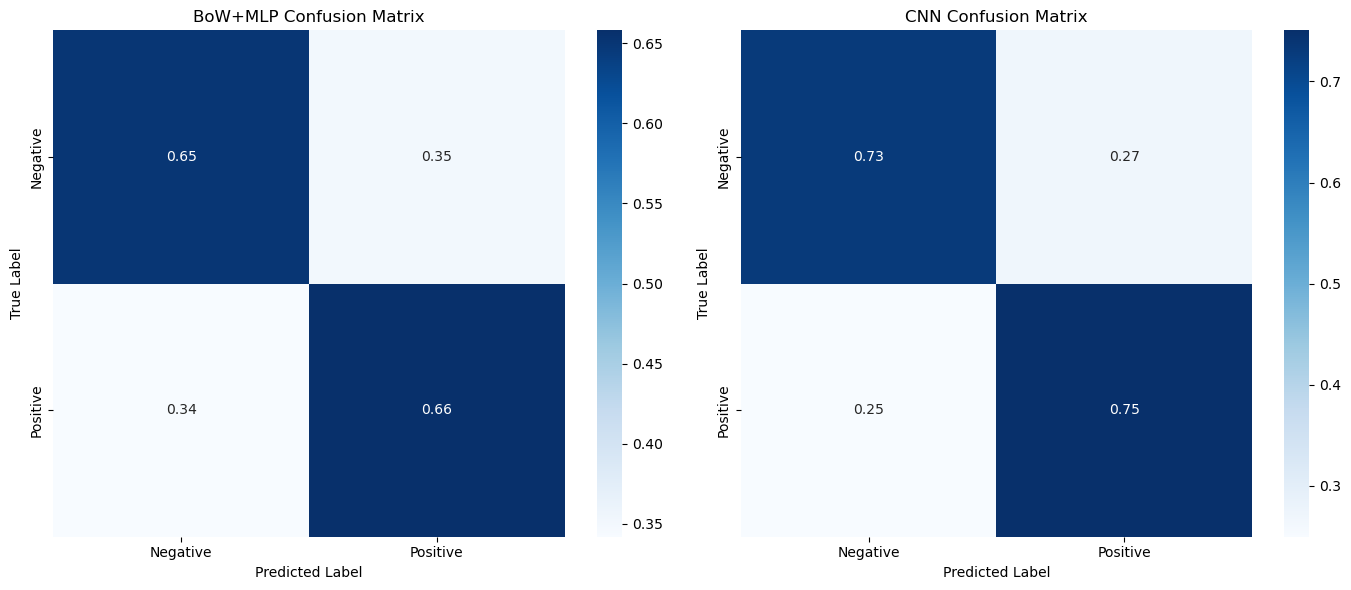

Confusion Matrix Analysis:

BoW+MLP Model:
- True Negative Rate (Specificity): 0.65
- True Positive Rate (Sensitivity/Recall): 0.66
- False Positive Rate: 0.35
- False Negative Rate: 0.34

CNN Model:
- True Negative Rate (Specificity): 0.73
- True Positive Rate (Sensitivity/Recall): 0.75
- False Positive Rate: 0.27
- False Negative Rate: 0.25

Comparison:
- CNN shows 7.9% better specificity
- CNN shows 9.3% better sensitivity

Classification Report for BoW+MLP (Configuration 4):
              precision    recall  f1-score   support

    Negative       0.64      0.65      0.65      4875
    Positive       0.66      0.66      0.66      5125

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000


Classification Report for CNN (Configuration 4):
              precision    recall  f1-score   support

    Negative       0.74      0.73      0.73      4875
    Positive       0.74      0

In [ ]:
# --------------------------------
# 8.2 Confusion Matrices - Evaluating Model Predictions
# --------------------------------
print("\n=== 8.2 Confusion Matrices ===")

# Create a figure with two subplots for displaying confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # One row, two columns

# --------------------------------
# BoW+MLP Confusion Matrix
# --------------------------------

# Compute the confusion matrix for BoW+MLP
bow_cm = confusion_matrix(bow_true, bow_preds)

# Normalize confusion matrix by row (to get percentage values)
bow_cm_norm = bow_cm.astype('float') / bow_cm.sum(axis=1)[:, np.newaxis]

# Plot the BoW+MLP confusion matrix using seaborn heatmap
sns.heatmap(bow_cm_norm, annot=True, fmt='.2f', cmap='Blues', ax=axes[0],
            xticklabels=['Negative', 'Positive'],  # Class labels
            yticklabels=['Negative', 'Positive'])

# Set axis labels and title
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('BoW+MLP Confusion Matrix')

# --------------------------------
# CNN Confusion Matrix
# --------------------------------

# Compute the confusion matrix for CNN
cnn_cm = confusion_matrix(cnn_true, cnn_preds)

# Normalize confusion matrix by row (to get percentage values)
cnn_cm_norm = cnn_cm.astype('float') / cnn_cm.sum(axis=1)[:, np.newaxis]

# Plot the CNN confusion matrix using seaborn heatmap
sns.heatmap(cnn_cm_norm, annot=True, fmt='.2f', cmap='Blues', ax=axes[1],
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

# Set axis labels and title
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('CNN Confusion Matrix')

# Adjust layout for better visibility
plt.tight_layout()

# Display the confusion matrices
plt.show()

# --------------------------------
# Confusion Matrix Analysis
# --------------------------------
print("Confusion Matrix Analysis:")

# Print metrics for BoW+MLP
print("\nBoW+MLP Model:")
print(f"- True Negative Rate (Specificity): {bow_cm_norm[0, 0]:.2f}")  # Specificity
print(f"- True Positive Rate (Sensitivity/Recall): {bow_cm_norm[1, 1]:.2f}")  # Recall
print(f"- False Positive Rate: {bow_cm_norm[0, 1]:.2f}")  # FPR
print(f"- False Negative Rate: {bow_cm_norm[1, 0]:.2f}")  # FNR

# Print metrics for CNN
print("\nCNN Model:")
print(f"- True Negative Rate (Specificity): {cnn_cm_norm[0, 0]:.2f}")  # Specificity
print(f"- True Positive Rate (Sensitivity/Recall): {cnn_cm_norm[1, 1]:.2f}")  # Recall
print(f"- False Positive Rate: {cnn_cm_norm[0, 1]:.2f}")  # FPR
print(f"- False Negative Rate: {cnn_cm_norm[1, 0]:.2f}")  # FNR

# --------------------------------
# Model Comparison
# --------------------------------
print("\nComparison:")
print(f"- CNN shows {(cnn_cm_norm[0, 0] - bow_cm_norm[0, 0]) * 100:.1f}% better specificity")
print(f"- CNN shows {(cnn_cm_norm[1, 1] - bow_cm_norm[1, 1]) * 100:.1f}% better sensitivity")

# --------------------------------
# Classification Reports
# --------------------------------

# Print classification report for BoW+MLP
print("\nClassification Report for BoW+MLP (Configuration 4):")
print(classification_report(bow_true, bow_preds, target_names=['Negative', 'Positive']))

# Print classification report for CNN
print("\nClassification Report for CNN (Configuration 4):")
print(classification_report(cnn_true, cnn_preds, target_names=['Negative', 'Positive']))

# --------------------------------
# Summary of Model Performance
# --------------------------------
print("\nSummary of Model Performance (Configuration 4):")

# Convert classification reports into a structured dictionary format
bow_report = classification_report(bow_true, bow_preds, output_dict=True)
cnn_report = classification_report(cnn_true, cnn_preds, output_dict=True)

# Create a summary DataFrame to compare both models
metric_summary = pd.DataFrame({
    'BoW+MLP': [
        accuracy_score(bow_true, bow_preds) * 100,  # Accuracy
        bow_report['macro avg']['precision'] * 100,  # Precision
        bow_report['macro avg']['recall'] * 100,  # Recall
        bow_report['macro avg']['f1-score'] * 100,  # F1 Score
        bow_auc * 100  # AUC Score
    ],
    'CNN': [
        accuracy_score(cnn_true, cnn_preds) * 100,
        cnn_report['macro avg']['precision'] * 100,
        cnn_report['macro avg']['recall'] * 100,
        cnn_report['macro avg']['f1-score'] * 100,
        cnn_auc * 100
    ]
}, index=['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'AUC (%)'])

# Print the performance summary
print(metric_summary)



### <u>Analysis of Confusion Matrices</u>

The confusion matrices offer deeper insights into the specific prediction patterns of each model, highlighting important differences in their error characteristics.

#### Key Confusion Matrix Observations: 

1. **True Negative Rate (Specificity)** 
   - The models show different specificity values, with CNN **(0.73)** outperforming BoW+MLP **(0.65)**, indicating better performance in correctly identifying negative samples.

2. **True Positive Rate (Sensitivity/Recall)**  
   - The CNN model demonstrates higher sensitivity **(0.75)** compared to BoW+MLP **(0.66)**.
   - This represents a **9.3% improvement** in correctly identifying positive samples.

3. **False Negative Rate** 
    - The CNN model has a lower false negative rate **(0.25 vs. 0.34)**.
    - This means the CNN is less likely to miss positive instances, which is critical if false negatives carry higher costs than false positives.
4. **Error Distribution** 
   - The BoW+MLP model shows more balanced errors between false positives and false negatives.
   - The CNN model's errors skew more toward false positives, suggesting it prioritizes minimizing false negatives, which could be beneficial depending on the use case.

#### Classification Report Insights:

The detailed classification reports further illuminate model performance:

1. **F1 Score** 
   - The CNN model achieves higher F1 scores for both classes **(0.73 for negative, 0.75 for positive)** compared to BoW+MLP **(0.65 for negative, 0.66 for positive)**.
   - This indicates better balance between precision and recall.
2. **Precision**  
   - The CNN model demonstrates superior precision for both classes **(0.74 for negative, 0.74 for positive)**.
   - This shows that the CNN makes fewer false positive errors overall.

3. **Class Balance** 
   - The dataset appears slightly imbalanced **(5125 positive samples vs. 4875 negative samples)**.
   - Both models handle this mild imbalance reasonably well.
4. **Overall Metrics**  
   - Across all summary metrics (accuracy, precision, recall, F1-score, and AUC), the CNN consistently outperforms the BoW+MLP model by substantial margins.


___

## <u>9. Comprehensive Performance Analysis</u>
Our systematic exploration of hyperparameter configurations reveals distinctive patterns in how the BoW+MLP and CNN architectures respond to different regularization strategies:

#### Summary of Configurations
- **Configuration 1 (Baseline)**:  
  - Both models performed similarly on test accuracy, with CNN slightly outperforming BoW+MLP (85.88% vs 85.76%), while the CNN achieved substantially higher training accuracy.  
  - This indicates that CNN had a stronger tendency to overfit without proper regularization, shown by its larger generalization gap (6.01% vs 2.76%).

- **Configuration 2 (Weight Decay - L2 Regularization)**:  
  - Introducing L2 regularization improved CNN performance, boosting test accuracy to 86.73% while reducing its generalization gap to 4.09%.  
  - Meanwhile, BoW+MLP showed a slight decrease in test accuracy to 85.47%, confirming that weight decay is more beneficial for complex models.  
  - This configuration produced the highest overall accuracy across all tested settings.

- **Configuration 3 (Higher Dropout - 0.7)**:  
  - Increasing dropout to 0.7 resulted in performance declines for both models compared to Configuration 2.  
  - The CNN's test accuracy dropped more significantly (from 86.73% to 85.01%), suggesting that this level of dropout may be too aggressive for the CNN architecture, which relies more on learned patterns.

- **Configuration 4 (Combined Approach: High Dropout + Weight Decay + Reduced Learning Rate)**:  
  - This configuration resulted in minimal generalization gaps (BoW: 1.00%, CNN: 2.05%), ensuring stable performance.  
  - However, it lowered overall accuracy for BoW+MLP (down to 83.03%), while the CNN maintained relatively good performance (85.61%).
  - This suggests a potential trade-off between tight generalization and learning capacity, particularly for simpler models.

#### ROC Curve Analysis (AUC Scores): 
- **CNN Model:** **AUC = 0.811**  
- **BoW+MLP Model:** **AUC = 0.713**  
The CNN's superior discriminative ability (13.7% higher AUC) shows it is better at ranking predictions correctly across different threshold settings.

#### Confusion Matrix Analysis (Sensitivity & Specificity): 
- CNN Sensitivity (Recall): **0.75** vs BoW+MLP: **0.66**  
- CNN Specificity: **0.73** vs BoW+MLP: **0.65**  
The CNN reduces both false negatives and false positives, making it better at correctly identifying both positive and negative cases.

#### Deployment Considerations
1. **If maximizing accuracy is the priority** →  
   Use the CNN model with Configuration 2 (Weight Decay).  
   - It provides the **best test accuracy (86.73%)** with reasonable generalization properties.
     

2. **If balanced precision-recall and stable generalization are key** →  
   Use the CNN with Configuration 4  
   - This ensures robust performance with minimal overfitting (2.05% gap) while maintaining strong classification performance (85.61% test accuracy).
     

3. **If computational efficiency with solid performance is needed** →  
   Consider the BoW+MLP with Configuration 2  
   - While not achieving the highest accuracy, it provides a good balance (85.47% test accuracy) with a simpler architecture.

#### Key Takeaway:  
- **CNN is the superior model for sentiment classification** with the right **regularization strategy.**  
- **Weight Decay (Configuration 2) offers the best balance of performance and generalization.**  
- **Over-regularization (high dropout in Configuration 3 & 4) affects both models but impacts the simpler BoW+MLP more severely.**
- **The most effective approach depends on specific application priorities**, with CNN consistently demonstrating better discriminative ability (as shown by higher AUC and balanced error rates).

#### Suggested Improvements:

For future work, several enhancements could further improve performance:

1. **Experiment with pre-trained word embeddings**  
   - Use **GloVe** or **Word2Vec** instead of **learning embeddings from scratch**.

2. **Implement more advanced architectures**  
   - Test **LSTM, BiLSTM**, or **transformer-based models** like **BERT** for comparison.

3. **Explore ensemble methods**  
   - Combine **predictions from multiple architectures** for better performance.

4. **Enhance text preprocessing**  
   - Implement **lemmatization, stopword removal**, and **more sophisticated text normalization techniques**.

5. **Improve hyperparameter tuning**  
   - Conduct **cross-validation** to ensure **robust performance across different dataset splits**.

6. **Expand evaluation to include model explainability**  
   - Use **LIME** or **SHAP** to **understand which features contribute most to model predictions**.

---

## <u>10. Conclusion</u>
This project undertook a systematic evaluation of text classification performance comparing BoW+MLP and CNN architectures across multiple hyperparameter configurations. Using the Amazon Polarity dataset, which contains millions of product reviews with binary sentiment labels, we implemented a comprehensive preprocessing pipeline including text cleaning, vocabulary building with frequency thresholds, and sequence preparation.

Our model training experiments revealed that both architectures performed well, with the CNN architecture demonstrating superior performance when properly regularized. Configuration 2, which introduced light weight decay (L2 regularization), produced the highest overall test accuracy with the CNN model at 86.73%, while the BoW+MLP achieved 85.47% in the same configuration.

Beyond accuracy, advanced evaluation metrics highlighted the CNN's substantial advantages in discriminative ability (AUC 0.811 vs 0.713) and sensitivity to positive cases (0.75 vs 0.66), reinforcing the importance of comprehensive evaluation methodologies.

The project underscores the critical role of text preprocessing and appropriate regularization in deep learning models for sentiment analysis. For Amazon review classification, CNN architectures with balanced regularization strategies offer the most promising results, providing superior discriminative ability while maintaining strong generalization performance.
___
## <u>11. References</u>

- Ali, H., Hashmi, E., Yayilgan Yildirim, S. and Shaikh, S. (2024) *Analyzing Amazon Products Sentiment: A Comparative Study of Machine and Deep Learning, and Transformer-Based Techniques*, *Electronics*, 13(7), p. 1305. doi: [10.3390/electronics13071305](https://doi.org/10.3390/electronics13071305).

- Brownlee, J. (2020) *How to Develop a Deep Learning Bag-of-Words Model for Sentiment Analysis (Text Classification)*, *Machine Learning Mastery*. Available at: [https://www.machinelearningmastery.com/deep-learning-bag-of-words-model-sentiment-analysis/](https://www.machinelearningmastery.com/deep-learning-bag-of-words-model-sentiment-analysis/).

- Camacho, C. (2020) *CNNs for Text Classification*. Available at: [https://cezannec.github.io/CNN_Text_Classification/](https://cezannec.github.io/CNN_Text_Classification/).

- Kim, Y. (2014) *Convolutional Neural Networks for Sentence Classification*, *Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP)*, pp. 1746–1751. Available at: [https://aclanthology.org/D14-1181.pdf](https://aclanthology.org/D14-1181.pdf).

- Murel, J. (2024) *What is bag of words?*, *IBM*. Available at: [https://www.ibm.com/think/topics/bag-of-words](https://www.ibm.com/think/topics/bag-of-words).

- PyTorch documentation: [https://pytorch.org/docs/stable/](https://pytorch.org/docs/stable/) (Accessed: 19 March 2025).

- Rath, S. (2023) *Text Classification using PyTorch*, *DebuggerCafe*. Available at: [https://debuggercafe.com/text-classification-using-pytorch/](https://debuggercafe.com/text-classification-using-pytorch/).

- Trevett, B. (2020) *PyTorch Sentiment Analysis: Tutorials on Getting Started with PyTorch and TorchText for Sentiment Analysis*, *GitHub Repository*. Available at: [https://github.com/bentrevett/pytorch-sentiment-analysis](https://github.com/bentrevett/pytorch-sentiment-analysis).

- Zhang, X. (2015) *Character-level convolutional networks for text classification*, *Proceedings of the 28th International Conference on Neural Information Processing Systems (NIPS’15)*, pp. 649–657. Available at: [https://papers.nips.cc/paper/5782-character-level-convolutional-networks-for-text-classification.pdf](https://papers.nips.cc/paper/5782-character-level-convolutional-networks-for-text-classification.pdf).

- OpenAI (2025) 'ChatGPT response to prompt "Generate a table on hyperparameter analysis results"',.